<a href="https://colab.research.google.com/github/kjbhardwaj99/Data-Analysis/blob/main/Global_Terrorism_Data_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')

import warnings  # Importing warnings to handle warnings
warnings.filterwarnings('ignore')  # Ignoring warnings for cleaner output

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

file_path = '/content/drive/MyDrive/data sci/project/EDA/Global Terrorism Data/Global Terrorism Data.csv'

# Try different encodings if the default fails
try:
    df = pd.read_csv(file_path)
    print("File read successfully with default encoding.")
except UnicodeDecodeError:
    print("Failed with default encoding. Trying other encodings...")
    for encoding in ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"File read successfully with encoding: {encoding}")
            break
        except UnicodeDecodeError:
            print(f"Failed to read with encoding: {encoding}")


Failed with default encoding. Trying other encodings...
Failed to read with encoding: utf-8
File read successfully with encoding: latin-1


In [4]:
df=pd.read_csv('/content/drive/MyDrive/data sci/project/EDA/Global Terrorism Data/Global Terrorism Data.csv',encoding='latin-1')

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.shape

(177140, 23)

# **Data Cleaning**

In [5]:
dupli=df.drop(['eventid'],axis=1)
print('Total Duplicates : ',len(dupli[dupli.duplicated()]))
print('Shape : ',df.shape)

# Specify the column to ignore when checking for duplicates
ignore_column = 'eventid'

# Get a list of columns to consider for finding duplicates
columns_to_consider = df.columns.difference([ignore_column])

# Drop duplicate rows based on the specified subset of columns
df = df.drop_duplicates(subset=columns_to_consider, keep='first')

# Print the resulting DataFrame
print('New Shape : ',df.shape)

Total Duplicates :  4551
Shape :  (181691, 135)
New Shape :  (177140, 135)


In [6]:
nulls=df.isna().sum().to_frame().reset_index().rename(columns={0:'col',1:'total'})
nulls

,index,col
0,eventid,0
1,iyear,0
2,imonth,0
3,iday,0
4,approxdate,168721
...,...,...
130,INT_LOG,0
131,INT_IDEO,0
132,INT_MISC,0
133,INT_ANY,0


In [7]:
print('Old Shape : ', df.shape)

# Drop columns based on the number of null values
for index, row in nulls.iterrows():
    column_name = row[0]  # Assuming the column name is in the first column
    null_count = row[1]   # Assuming the null count is in the second column

    # Skip specified columns
    if column_name in ['city', 'provstate', 'nkill', 'nwound', 'propextent_txt', 'ransomamt', 'ransompaid']:
        continue

    # Drop columns with more than 100 null values
    if null_count > 100:
        df.drop(columns=[column_name], axis=1, inplace=True)

# Drop predefined set of columns
columns_to_drop = ['specificity', 'vicinity', 'region', 'country', 'crit1', 'crit2', 'crit3',
                   'doubtterr', 'multiple', 'attacktype1', 'targtype1', 'weaptype1',
                   'INT_MISC', 'INT_ANY','dbsource','property']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

print('New Shape : ', df.shape)


Old Shape :  (177140, 135)
New Shape :  (177140, 23)


In [8]:
df.isna().sum().to_frame().reset_index().rename(columns={0:'col',1:'total'})

,index,col
0,eventid,0
1,iyear,0
2,imonth,0
3,iday,0
4,extended,0
5,country_txt,0
6,region_txt,0
7,provstate,421
8,city,435
9,success,0


In [9]:
df['city'].replace(np.nan,'No Info',inplace=True)
df['provstate'].replace(np.nan,'No Info',inplace=True)
df['nkill'].replace(np.nan,0,inplace=True)

df['nwound'].replace(np.nan,0,inplace=True)
df['propextent_txt'].replace(np.nan,'Unknown',inplace=True)

df['ransomamt'].replace(np.nan,0,inplace=True)
df['ransompaid'].replace(np.nan,0,inplace=True)

df['success'].replace({0:'No',1:'Yes'},inplace=True)
df['suicide'].replace({0:'No',1:'Yes'},inplace=True)
df['individual'].replace({0:'No',1:'Yes'},inplace=True)
df['extended'].replace({0:'No',1:'Yes'},inplace=True)



In [10]:
df.isna().sum().to_frame().reset_index().rename(columns={0:'col',1:'total'})

,index,col
0,eventid,0
1,iyear,0
2,imonth,0
3,iday,0
4,extended,0
5,country_txt,0
6,region_txt,0
7,provstate,0
8,city,0
9,success,0


1. eventid-Incidents from the GTD follow a 12-digit Event ID system

2.	iyear	- This field contains the year in which the incident occurred. In the case of incident(s) occurring over an extended period, the field will record the year when the incident was initiated.  
2.	imonth	- This field contains the number of the month in which the incident occurred. In the case of incident(s) occurring over an extended period, the field will record the month when the incident was initiated.  
3.	iday	- This field contains the numeric day of the month on which the incident occurred. In the case of incident(s) occurring over an extended period, the field will record the day when the incident was initiated.  
4.	extended	- 1 = "Yes" The duration of an incident extended more than 24 hours.  0 = "No" The duration of an incident extended less than 24 hours.
5.	country_txt	- This field identifies the country or location where the incident occurred.
6.	region_txt	- This field identifies the region in which the incident occurred. The regions are divided into the following 12 categories

7. 	provstate	- This variable records the name (at the time of event) of the 1st order subnational administrative region in which the event occurs.  
8.	city- This field contains the name of the city, village, or town in which the incident occurred

7.	success	- 1 = "Yes"  The incident was successful.  0 = "No"  The incident was not successful.
8.	suicide	- 1 = "Yes"  The incident was a suicide attack.  0 = "No"  There is no indication that the incident was a suicide attack.
9.	attacktype1_txt	-Attack Type Hierarchy: Assassination Hijacking Kidnapping Barricade Incident Bombing/Explosion Armed Assault Unarmed Assault Facility/Infrastructure Attack Unknown
10.	targtype1_txt	- The target/victim type field captures the general type of target/victim. When a victim is attacked specifically because of his or her relationship to a particular person, such as a prominent figure, the target type reflects that motive
11.	gname	- This field contains the name of the group that carried out the attack.
12.	individual	- 1 = "Yes" The perpetrator(s) were identified by name (or specific unnamed minors) and not known to be affiliated with a group or organization.  0 = "No" The perpetrator(s) were not identified as unaffiliated individuals (i.e. the perpetrators were either not identified by name, or were known to be affiliated with a group or organization).
13.	weaptype1_txt	- Up to four weapon types are recorded for each incident. This field records the general type of weapon used in the incident. It consists of the following categories: 1 = Biological ,2 = Chemical ,3 = Radiological,4 = Nuclear,5 = Firearms,6 = Explosives,7 = Fake Weapons,8 = Incendiary,9 = Melee,10 = Vehicle,11 = Sabotage,12 = Other,13 = Unknown

16.	nkill	- This field stores the number of total confirmed fatalities for the incident. The number includes all victims and attackers who died as a direct result of the incident.  
17.	nwound	- This field records the number of confirmed non-fatal injuries to both perpetrators and victims. It follows the conventions of the “Total Number of Fatalities” field described above.

19.	propextent_txt	- If “Property Damage?” is “Yes,” then one of the following four categories describes the extent of the property damage:  1 = Catastrophic (likely ≥ $1 billion) 2 = Major (likely ≥ $1 million but < $1 billion) 3 = Minor (likely < $1 million) 4 = Unknown
20.	ransomamt	- If a ransom was demanded, then the amount (in U.S. dollars) is listed in this field.
21	ransompaid	- If a ransom amount was paid, then the amount (in U.S. dollars) is listed in this field.

16.	INT_LOG	- 1 = "Yes" The attack was logistically international; the nationality of the perpetrator group differs from the location of the attack. If the perpetrator group is multinational, the attack is logistically international if all of the group’s nationalities differ from the location of the attack. 0 = "No" The attack was logistically domestic; the nationality of the perpetrator group is the same as the location of the attack. If the perpetrator group is multinational, the attack is logistically domestic if any of the group’s nationalities is the same as the location of the attack. -9 = "Unknown" It is unknown if the attack was logistically international or domestic; the nationality of the perpetrator group is unknown.
17.	INT_IDEO	- 1 = "Yes" The attack was ideologically international; the nationality of the perpetrator group differs from the nationality of the target(s)/victim(s). If the perpetrator group or target is multinational, the attack is ideologically international.
0 = "No" The attack was ideologically domestic; any and all nationalities of the perpetrator group are the same as the nationalities of the target(s)/victim(s).  -9 = "Unknown" It is unknown if the attack was logistically international or domestic; the nationality of the perpetrator group or the nationality of the target/victim is unknown.

In [11]:
df.describe()

,eventid,iyear,imonth,iday,nkill,nwound,ransomamt,ransompaid,INT_LOG,INT_IDEO
count,1.771400e+05,177140.000000,177140.00000,177140.000000,177140.000000,177140.000000,1.771400e+05,1.771400e+05,177140.000000,177140.000000
mean,2.002814e+11,2002.747290,6.46881,15.514028,2.316637,2.949424,2.383942e+04,3.137001e+03,-4.541555,-4.463103
std,1.318181e+09,13.181724,3.39230,8.814667,11.361815,34.743079,2.648949e+06,6.717693e+05,4.543593,4.636399
min,1.970000e+11,1970.000000,0.00000,0.000000,0.000000,0.000000,-9.900000e+01,-9.900000e+01,-9.000000,-9.000000
25%,1.991042e+11,1991.000000,4.00000,8.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-9.000000,-9.000000
50%,2.009032e+11,2009.000000,6.00000,15.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-9.000000,-9.000000
75%,2.014080e+11,2014.000000,9.00000,23.000000,2.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
max,2.017123e+11,2017.000000,12.00000,31.000000,1570.000000,8191.000000,1.000000e+09,2.750000e+08,1.000000,1.000000


In [12]:
descriptive_cols=df.describe().columns.tolist()
categorical_cols=[i for i in df.columns if i not in descriptive_cols]

# **WorldWide**

In [146]:
import plotly.express as px
import pandas as pd

# Sample data setup (replace this with your actual dataframe)
data = df['iyear'].value_counts().sort_index().reset_index()
data.columns = ['Year', 'Number of Attacks']

# Create a bar plot with Plotly Express
fig = px.bar(data,
             x='Year',
             y='Number of Attacks',
             title='Number of Attacks Per Year',
             labels={'Year': 'Year', 'Number of Attacks': 'Number of Attacks'},
             color='Number of Attacks',
             color_continuous_scale='gray_r')  # Optional: reverse the color scale

# Update layout for better readability
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Attacks',
    xaxis_tickangle=-90,
    title_font_size=20,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14
)

# Add black borders around the bars
fig.update_traces(marker=dict(line=dict(color='black', width=1)))

# Show the plot
fig.show()


* Historical Trends: The number of terrorist attacks shows a generally increasing trend over the years. Starting from 645 attacks in 1970, the count rose significantly to 10,643 in 2017.

* Peak Years: The data highlights peak years with the highest number of attacks. The year 2014 experienced the highest number of attacks, with 16,475 recorded incidents. This peak is followed by a high count in 2013 (11,885 attacks) and 2015 (14,572 attacks).

* Recent Years: There was a noticeable increase in attacks from the early 2000s, with a significant rise observed from 2012 onwards. The number of attacks surged particularly in 2013 and 2014, before slightly declining in the subsequent years.

* Notable Declines: After 2014, there was a slight decline in the number of attacks, with 2017 showing 10,643 incidents, indicating a decrease from the peak years.

Overall, the data indicates a significant escalation in terrorist attacks over the years, with notable peaks in the early 2010s.

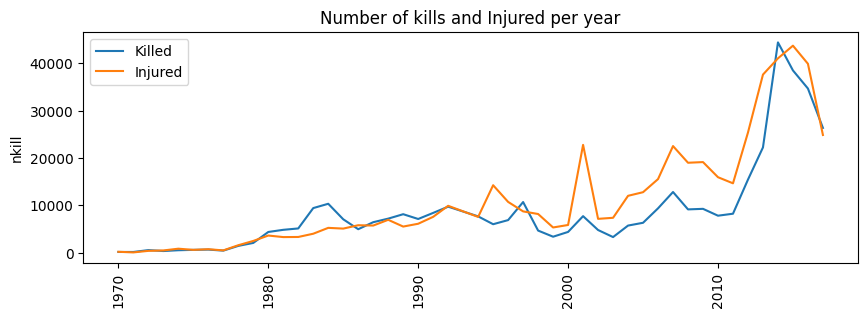

In [124]:
plt.figure(figsize=(10,3))

grouped_df = df[['iyear', 'nkill', 'nwound']].groupby('iyear').sum().reset_index()

sns.lineplot(x='iyear',y='nkill',data=grouped_df,label='Killed')
sns.lineplot(x='iyear',y='nwound',data=grouped_df,label='Injured')

plt.title('Number of kills and Injured per year')
plt.xlabel('')
plt.xticks(rotation=90)
plt.show()

**Total Killings and Woundings Over the Years:**

---


* 1970-1979: The number of killings and woundings started relatively low but increased significantly throughout this decade. For example, in 1979, killings reached 2,082 and woundings were 2,501.

* 1980-1989: This period saw a substantial rise in both killings and woundings. By 1988, killings had reached 7,207, and woundings had increased to 6,958. The peak year was 1984, with 10,342 killings and 5,261 woundings.

* 1990-1999: Killings and woundings continued to rise sharply. The 1990s saw the highest increase, with 1992 being particularly notable, having 9,731 killings and 9,914 woundings. The trend reflects a dramatic escalation in violence.

* 2000-2009: This decade marked some of the highest figures for both categories. For instance, 2007 saw a peak with 12,824 killings and 22,518 woundings. The trend continued high, reflecting ongoing intense conflict and violence.

* 2010-2017: The numbers remained high, with notable peaks in 2014 (44,391 killings and 41,027 woundings) and 2013 (22,233 killings and 37,599 woundings). Despite some fluctuations, the overall trend indicates a high level of violence through the 2010s.

**Trends:**

---


* Increase in Violence: Both killings and woundings have generally increased over the years, with some fluctuations. Significant spikes are observed in the late 2000s and early 2010s.

* High Peak Periods: The highest numbers of killings and woundings occurred in the early 2010s, particularly in 2014, indicating a peak in terrorist violence during this period.

**Insights:**

---


The data suggests a clear upward trend in terrorist violence over the decades, with the most intense periods being the late 2000s and early 2010s. This increase might reflect broader geopolitical conflicts, rising terrorist activities, or changes in reporting and recording of incidents.

In [153]:
# Prepare the data
suicide_data = df[df['suicide'] == 'Yes'].groupby('iyear').size().reset_index(name='Number of Attacks')

# Create a line plot with Plotly Express
fig = px.line(suicide_data,
              x='iyear',
              y='Number of Attacks',
              title='Number of Suicidal Attacks per Year',
              labels={'iyear': 'Year', 'Number of Attacks': 'Number of Suicidal Attacks'},
              markers=True)  # Adding markers to each data point

# Update layout and traces for better readability
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Suicidal Attacks',
    title_font_size=20,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickangle=-90,  # Rotate x-axis labels
    xaxis=dict(
        tickmode='linear',  # Ensure all years are displayed
    ),
    yaxis=dict(
        showgrid=True,  # Show gridlines for better readability
    )
)

# Update trace to set line and marker color to black
fig.update_traces(line=dict(color='black'), marker=dict(color='black'))

# Show the plot
fig.show()


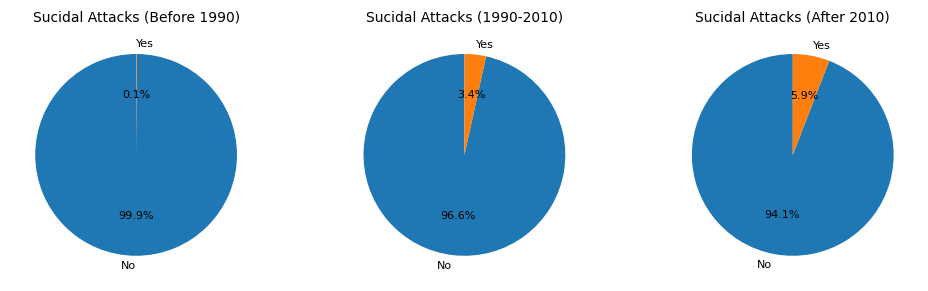

In [127]:

# Prepare data for pie charts
suicide_counts_1990 = df[df['iyear'] < 1990].groupby('suicide').count()['iyear']
sucide_counts_2010 = df[(df['iyear'] > 1990) & (df['iyear'] < 2010)].groupby('suicide').count()['iyear']
sucide_counts_2017 = df[df['iyear'] > 2010].groupby('suicide').count()['iyear']

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 3))  # 1 row, 3 columns

# Plot pie charts
axs[0].pie(suicide_counts_1990,labels=['No','Yes'], autopct='%1.1f%%', startangle=90,textprops={'fontsize':8})
axs[0].set_title('Sucidal Attacks (Before 1990)',fontsize=10)

axs[1].pie(sucide_counts_2010,labels=['No','Yes'], autopct='%1.1f%%', startangle=90,textprops={'fontsize':8})
axs[1].set_title('Sucidal Attacks (1990-2010)',fontsize=10)

axs[2].pie(sucide_counts_2017,labels=['No','Yes'], autopct='%1.1f%%', startangle=90,textprops={'fontsize':8})
axs[2].set_title('Sucidal Attacks (After 2010)',fontsize=10)

# Adjust layout to prevent clipping
plt.tight_layout()


# Show the plot
plt.show()


* Initial Years: The number of suicide attacks was relatively low in the early years, with only 1 reported in 1981 and 1982. This figure increased gradually over the subsequent years.

* Early 1990s Increase: A noticeable increase began in the mid-1990s, with 22 attacks in 1995 and 21 attacks in 1998, showing a growing trend.

* Significant Growth in 2000s: From the year 2000 onwards, the number of suicide attacks surged significantly. In 2000, there were 37 attacks, which rose to 122 in 2004.

* Peak Years: The data shows a dramatic rise in suicide attacks during the 2010s, reaching a peak in 2016 with 984 attacks. The highest number of attacks was recorded in 2015, with 911 incidents.

* Recent Trends: While the number of suicide attacks remained high in the early 2010s, there was a slight decline in 2017, with 841 attacks. Despite this decline, the figures remain elevated compared to earlier years.

Overall, the data indicates a sharp increase in suicide attacks from the early 1990s, with significant peaks in the mid-2010s.

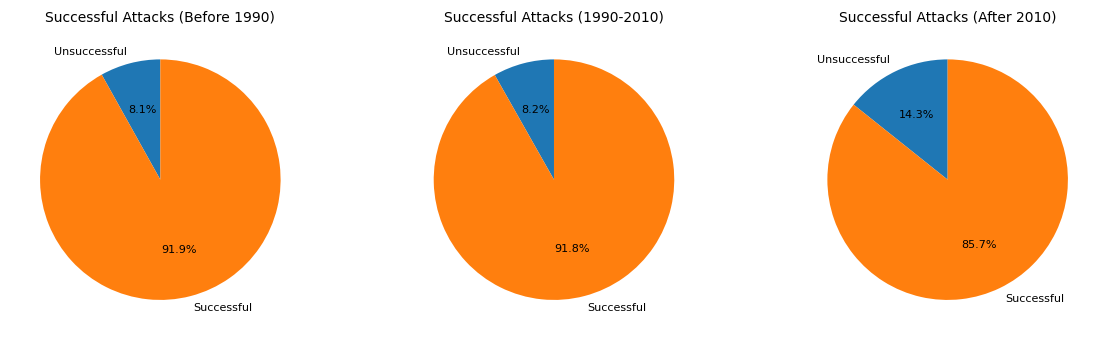

In [128]:
import matplotlib.pyplot as plt

# Prepare data for pie charts
success_counts_1990 = df[df['iyear'] < 1990].groupby('success').count()['iyear']
success_counts_2010 = df[(df['iyear'] > 1990) & (df['iyear'] < 2010)].groupby('success').count()['iyear']
success_counts_2017 = df[df['iyear'] > 2010].groupby('success').count()['iyear']

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 3.5))  # 1 row, 3 columns

# Plot pie charts
axs[0].pie(success_counts_1990,labels=['Unsuccessful','Successful'], autopct='%1.1f%%', startangle=90,textprops={'fontsize':8})
axs[0].set_title('Successful Attacks (Before 1990)',fontsize=10)

axs[1].pie(success_counts_2010,labels=['Unsuccessful','Successful'], autopct='%1.1f%%', startangle=90,textprops={'fontsize':8})
axs[1].set_title('Successful Attacks (1990-2010)',fontsize=10)

axs[2].pie(success_counts_2017,labels=['Unsuccessful','Successful'], autopct='%1.1f%%', startangle=90,textprops={'fontsize':8})
axs[2].set_title('Successful Attacks (After 2010)',fontsize=10)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


**Before 1990:**

---



* Successful Attacks (Yes): 45,189
* Unsuccessful Attacks (No): 4,034
* Summary: Prior to 1990, the number of successful terrorist attacks was
* significantly higher than unsuccessful ones, with a ratio of approximately 11:1.

**Between 1990 and 2010:**

---



* Successful Attacks (Yes): 45,189
* Unsuccessful Attacks (No): 4,034
* Summary: The counts for successful and unsuccessful attacks remained unchanged from the previous period, indicating a consistent pattern in this timeframe.

**After 2010:**

---



* Successful Attacks (Yes): 68,586
* Unsuccessful Attacks (No): 11,427
* Summary: Following 2010, there was a notable increase in successful terrorist attacks, reaching 68,586. Unsuccessful attacks also rose, but not as significantly, with a count of 11,427.

**Observations:**

---


* Increase in Success Rate: There is a marked increase in the number of successful terrorist attacks after 2010 compared to earlier periods.
* Consistent Counts Before 1990 and 1990-2010: The numbers for successful and unsuccessful attacks were consistent before 1990 and during 1990-2010, indicating no significant changes in attack success rates during these periods.
* Recent Trends: The rise in successful attacks after 2010 highlights a trend of increasing effectiveness or success rate of terrorist operations in recent years.

In [130]:
import plotly.express as px
import pandas as pd

# Sample data preparation
# df = your original dataset
country_counts = df.groupby('country_txt').count()['iyear'].reset_index()
country_counts.columns = ['country', 'count']

# Create a choropleth map
fig = px.choropleth(
    country_counts,
    locations="country",
    locationmode="country names",
    color="count",
    color_continuous_scale="OrRd",
    labels={"count": "Number of Incidents"},
    title="Global Incidents by Country"
)

# Show the map
fig.show()


In [147]:
import plotly.express as px
import pandas as pd

# Sample data setup (replace this with your actual dataframe)
data = df.groupby('country_txt').count()['iyear'].sort_values(ascending=False).head(25).reset_index()
data.columns = ['Country', 'Number of Attacks']

# Create a bar plot with Plotly Express
fig = px.bar(data,
             x='Country',
             y='Number of Attacks',
             color='Number of Attacks',
             color_continuous_scale='gray_r',  # Red to Green color gradient
             title='Top 25 Countries with Highest Numbers of Attacks')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Number of Attacks',
    xaxis_tickangle=-45,
    coloraxis_colorbar=dict(
        title='Number of Attacks',
        tickvals=[data['Number of Attacks'].min(), data['Number of Attacks'].max()],
        ticktext=['Low', 'High']
    ),
    title_font_size=20
)


# Add black borders around the bars
fig.update_traces(marker=dict(line=dict(color='black', width=1)))

# Show the plot
fig.show()


**Observations:**

---


* Highest Incidence: Iraq leads by a significant margin, with over 23,000 attacks, indicating a severe and prolonged conflict situation.
Other Highly Affected Countries: Pakistan, Afghanistan, and India follow with substantial numbers, each recording over 10,000 attacks, reflecting ongoing conflicts and terrorism issues in these regions.
* Diverse Locations: The list includes countries from various continents, including the Americas, Asia, Africa, and Europe, highlighting that terrorism affects a wide range of geographic areas.
* Recent Trends: Countries like Turkey and Nigeria show a high number of attacks, suggesting ongoing terrorism issues in these regions.

In [149]:
import plotly.express as px

# Prepare data
city_counts = df[df['city'] != 'Unknown'].groupby('city').count()['iyear'].sort_values(ascending=False).head(25).reset_index()
city_counts.columns = ['City', 'Number of Attacks']

# Create a bar plot with Plotly Express
fig = px.bar(city_counts,
             x='City',
             y='Number of Attacks',
             title='Top 25 Cities with Highest Numbers of Attacks',
             labels={'City': 'City', 'Number of Attacks': 'Number of Attacks'},
             color='Number of Attacks',
             color_continuous_scale='gray_r')  # Optional: reverse the color scale

# Update layout for better readability
fig.update_layout(
    xaxis_title='City',
    yaxis_title='Number of Attacks',
    xaxis_tickangle=-90,
    title_font_size=20,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14
)

# Add black borders around the bars
fig.update_traces(marker=dict(line=dict(color='black', width=1)))

# Show the plot
fig.show()


**Observations:**

---


* Highest Incidence: Baghdad is significantly affected, with the highest number of attacks, reflecting the severe security situation in the city.
* Prominent Locations: Cities like Karachi, Lima, and Mosul also experience high levels of terrorism, indicating ongoing conflicts and instability.
* Geographic Diversity: The list includes cities from different regions such as the Middle East (Baghdad, Beirut, Istanbul), South America (Lima, Bogota), and Africa (Mogadishu), showcasing the widespread nature of terrorism.
Recent Trends: Cities like Istanbul and Athens, despite being in relatively stable regions, show considerable attack numbers, which may be tied to specific conflict or terrorism issues in these areas.

In [150]:
import plotly.express as px

# Prepare the data
attack_type_counts = df.groupby('attacktype1_txt').count()['iyear'].sort_values().reset_index()
attack_type_counts.columns = ['Attack Type', 'Number of Attacks']

# Create a horizontal bar plot with Plotly Express
fig = px.bar(attack_type_counts,
             y='Attack Type',
             x='Number of Attacks',
             title='Attack Types',
             labels={'Attack Type': 'Attack Type', 'Number of Attacks': 'Number of Attacks'},
             orientation='h',
             color='Number of Attacks',
             color_continuous_scale='gray_r')

# Update layout for better readability
fig.update_layout(
    yaxis_title='',
    xaxis_title='',
    title_font_size=20,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14
)

# Add black borders around the bars
fig.update_traces(marker=dict(line=dict(color='black', width=1)))

# Show the plot
fig.show()


**Observations:**

---


* Most Common Attack: Bombing/Explosion is by far the most common type of terrorist attack, with a substantial margin over other types.
* High Incidence: Armed Assault and Assassination are also significant, reflecting various methods of violence employed by terrorist groups.
* Less Common Types: Hijacking and Hostage Taking (Barricade Incident) are less frequent but still contribute to the overall terrorism landscape.
* Unknown Attacks: A notable number of attacks are categorized as Unknown, which might indicate a lack of specific details or classification challenges in these cases.

In [151]:
import plotly.express as px

# Prepare the data
group_counts = df[df['gname'] != 'Unknown'].groupby('gname').count()['iyear'].sort_values(ascending=False).head(20).reset_index()
group_counts.columns = ['Group', 'Number of Attacks']

# Create a bar plot with Plotly Express
fig = px.bar(group_counts,
             x='Group',
             y='Number of Attacks',
             title='Top 20 Terrorist Groups by Number of Attacks',
             labels={'Group': 'Terrorist Group', 'Number of Attacks': 'Number of Attacks'},
             color='Number of Attacks',
             color_continuous_scale='gray_r')

# Update layout for better readability
fig.update_layout(
    xaxis_title='',
    yaxis_title='',
    title_font_size=20,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickangle=-45
)

# Add black borders around the bars
fig.update_traces(marker=dict(line=dict(color='black', width=1)))

# Show the plot
fig.show()


These organizations have been responsible for a significant number of terrorist attacks, with the Taliban and ISIL leading the list.

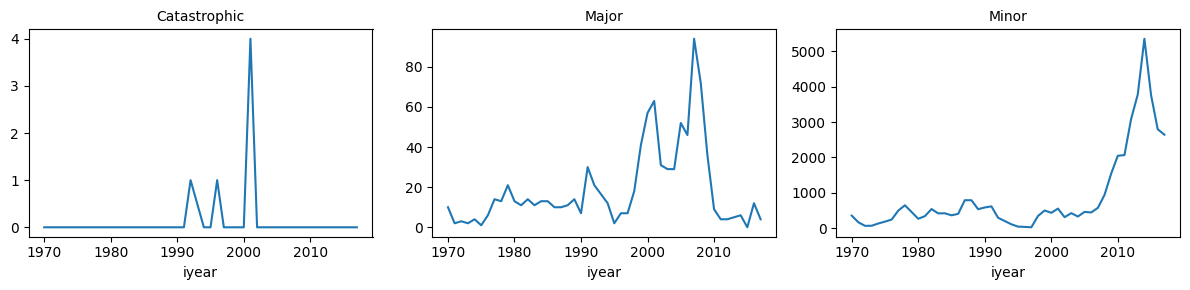

In [135]:
# Create a figure and a 1x3 grid of subplots
fig, ax = plt.subplots(1, 3, figsize=(12, 3))  # 1 row, 3 columns

# Plot pie charts
df[df['propextent_txt']!='Unknown'].groupby(['iyear','propextent_txt'])['iyear'].count().unstack().fillna(0)['Catastrophic (likely >= $1 billion)'].plot(ax=ax[0])
ax[0].set_title('Catastrophic',fontsize=10)

df[df['propextent_txt']!='Unknown'].groupby(['iyear','propextent_txt'])['iyear'].count().unstack().fillna(0)[
    'Major (likely >= $1 million but < $1 billion)'].plot(ax=ax[1])
ax[1].set_title('Major',fontsize=10)

df[df['propextent_txt']!='Unknown'].groupby(['iyear','propextent_txt'])['iyear'].count().unstack().fillna(0)['Minor (likely < $1 million)'].plot(ax=ax[2])
ax[2].set_title('Minor',fontsize=10)

plt.tight_layout()


# Show the plot
plt.show()

**Catastrophic Attacks:**

---


* 1970-1989: There were no catastrophic attacks recorded during this period.
* 1990-1999: Minimal occurrences, with a few years showing 1 attack (1992, 1996).
* 2000-2017: Very few catastrophic attacks, with only a few years showing any incidents (2001: 4 attacks).

**Major Attacks:**

---


* 1970-1990: The number of major attacks fluctuates, with some spikes. Notable peaks include 21 attacks in 1979 and 30 attacks in 1991. The numbers increase towards the late 1980s and early 1990s.
* 1991-2007: Significant rise, peaking at 94 attacks in 2007. This period shows a notable increase in the frequency of major attacks.
* 2008-2017: The number of major attacks fluctuates, with a peak in 2014 (6 attacks) and a decline in the following years. Some years (e.g., 2009, 2010) show a lower number of incidents.

**Minor Attacks:**

---


* 1970-1990: A consistent number of minor attacks, with significant peaks in 1977 (498 attacks), 1978 (647 attacks), and the late 1980s. The numbers are generally high compared to major attacks.
* 1991-2007: A sharp increase in minor attacks, peaking at 2,048 in 2010 and showing a consistent upward trend in the 2000s.
* 2008-2017: Continued high numbers, with peaks in 2014 (5,358 attacks) and a decline towards the end of the period, but still remaining high compared to earlier years.

**Trends:**

---


* Catastrophic Attacks: Very rare across the entire period.
* Major Attacks: Increased significantly from the early 1990s to the late 2000s, with fluctuations in the later years.
* Minor Attacks: Show a marked increase from the late 1990s, peaking significantly in the early 2010s.

# **Region**

In [ ]:
df['region_txt'].unique()

array(['Central America & Caribbean', 'Southeast Asia', 'Western Europe',
       'East Asia', 'North America', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [ ]:
df_Central_America_n_Caribbean = df[df['region_txt']=='Central America & Caribbean']
df_Southeast_Asia=df[df['region_txt']=='Southeast Asia']
df_Western_Europe=df[df['region_txt']=='Western Europe']
df_East_Asia=df[df['region_txt']=='East Asia']
df_North_America=df[df['region_txt']=='North America']
df_South_America=df[df['region_txt']=='South America']
df_Eastern_Europe=df[df['region_txt']=='Eastern Europe']
df_Sub_Saharan_Africa=df[df['region_txt']=='Sub-Saharan Africa']
df_Middle_East_n_North_Africa=df[df['region_txt']=='Middle East & North Africa']
df_Australasia_n_Oceania=df[df['region_txt']=='Australasia & Oceania']
df_South_Asia=df[df['region_txt']=='South Asia']
df_Central_Asia=df[df['region_txt']=='Central Asia']

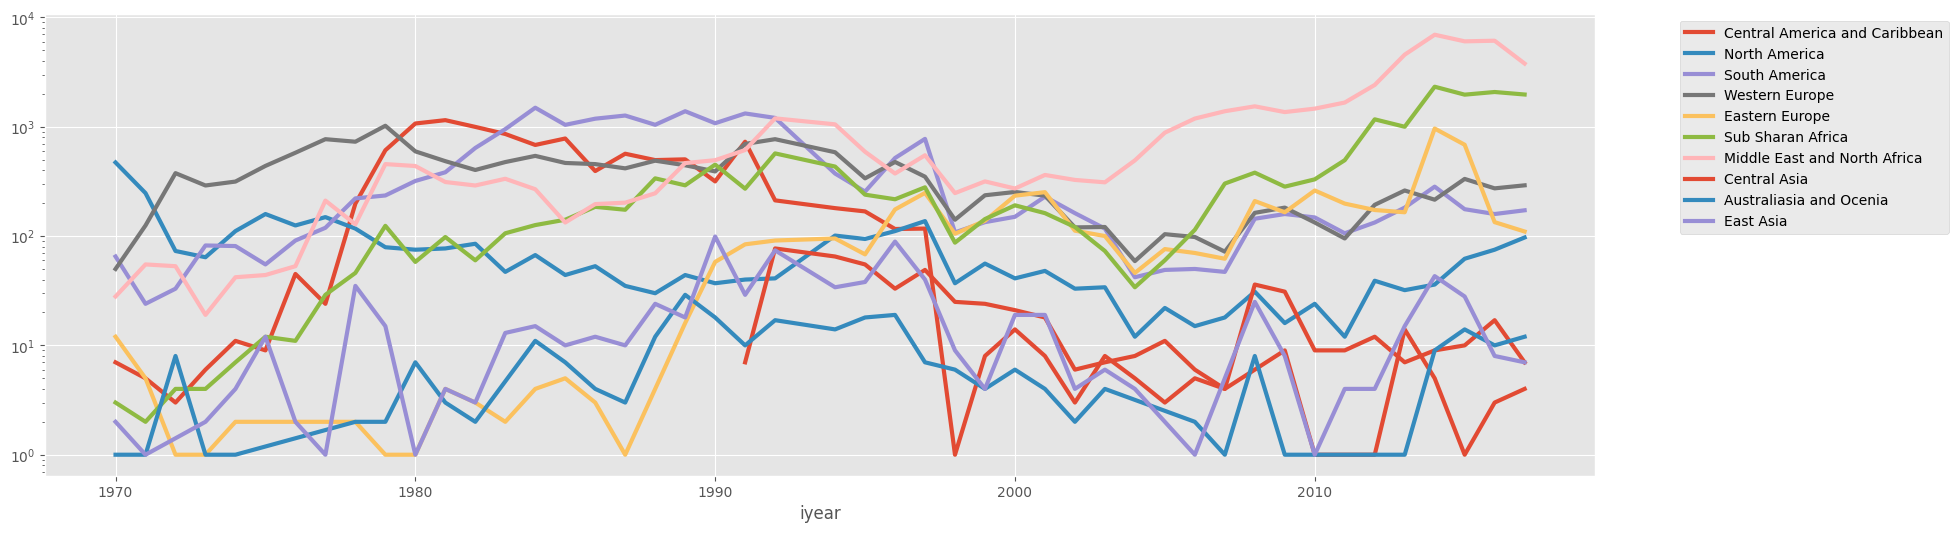

In [ ]:
plt.figure(figsize=(20,6))
i=3
df_Central_America_n_Caribbean.groupby('iyear')['iyear'].value_counts().plot(label='Central America and Caribbean',linewidth=i)
df_North_America.groupby('iyear')['iyear'].value_counts().plot(label='North America',linewidth=i)
df_South_America.groupby('iyear')['iyear'].value_counts().plot(label='South America',linewidth=i)

df_Western_Europe.groupby('iyear')['iyear'].value_counts().plot(label='Western Europe',linewidth=i)
df_Eastern_Europe.groupby('iyear')['iyear'].value_counts().plot(label='Eastern Europe',linewidth=i)

df_Sub_Saharan_Africa.groupby('iyear')['iyear'].value_counts().plot(label='Sub Sharan Africa',linewidth=i)
df_Middle_East_n_North_Africa.groupby('iyear')['iyear'].value_counts().plot(label='Middle East and North Africa',linewidth=i)

df_Central_Asia.groupby('iyear')['iyear'].value_counts().plot(label='Central Asia',linewidth=i)
df_Australasia_n_Oceania.groupby('iyear')['iyear'].value_counts().plot(label='Australiasia and Ocenia',linewidth=i)
df_East_Asia.groupby('iyear')['iyear'].value_counts().plot(label='East Asia',linewidth=i)

plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

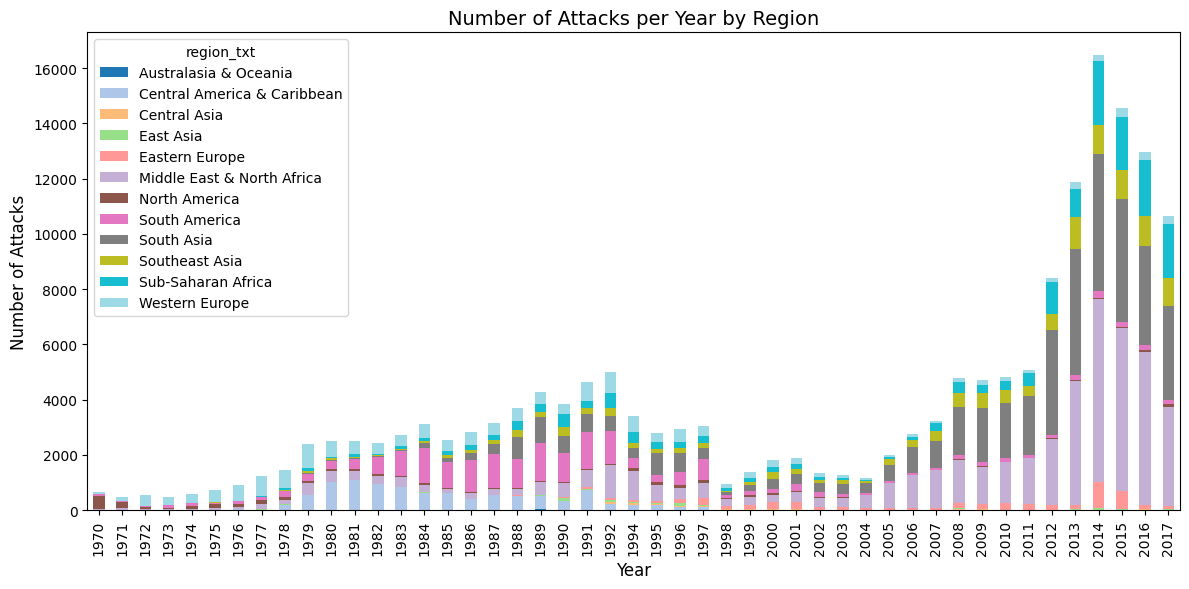

In [154]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data preparation
# Group by year and region, then count the number of attacks
grouped_df = df.groupby(['iyear', 'region_txt']).size().unstack().fillna(0)

# Create a figure with a specific size
plt.figure(figsize=(12, 6))
ax=plt.axes()
# Plot the data
grouped_df.plot(kind='bar', stacked=True, colormap='tab20',ax=ax)  # Use colormap for color

# Customize the plot
plt.title('Number of Attacks per Year by Region', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


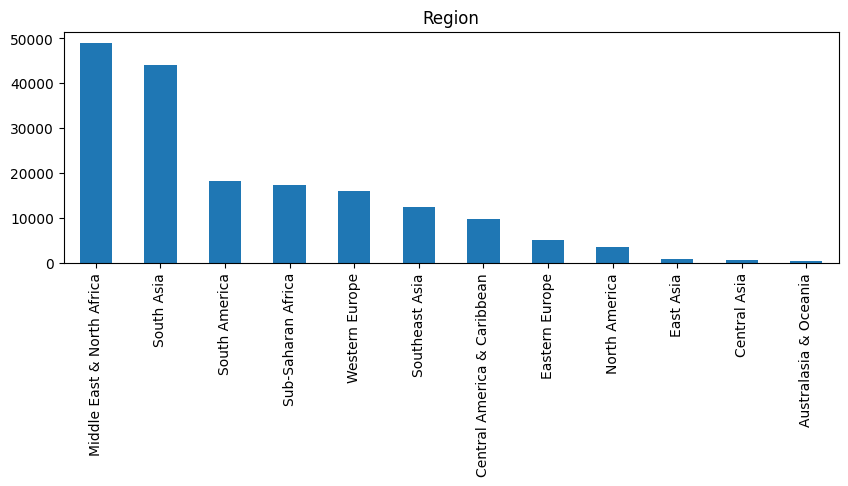

In [155]:
plt.figure(figsize=(10,3))

df.groupby('region_txt').count()['iyear'].sort_values(ascending=False).plot(kind='bar')

plt.title('Region')
plt.xlabel('')
plt.show()

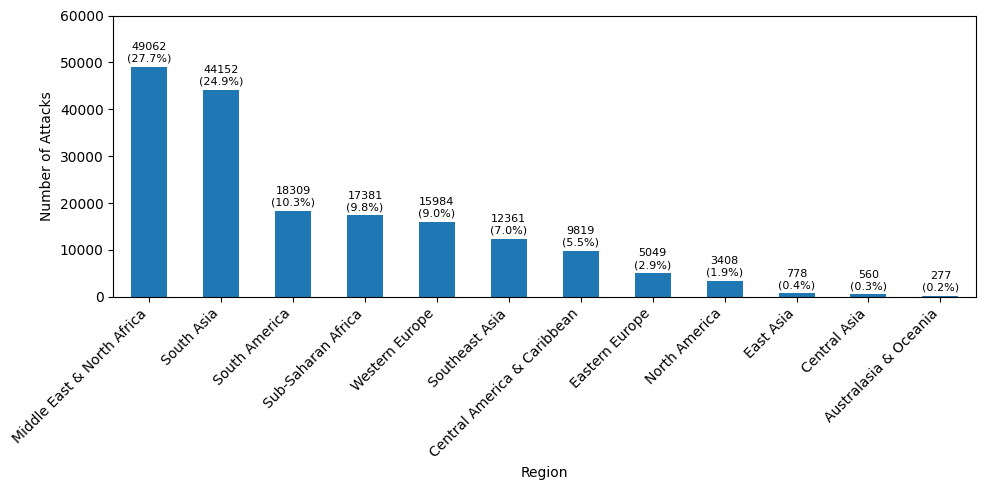

In [156]:
import matplotlib.pyplot as plt

# Group, count, and sort the data
grouped_data = df.groupby('region_txt').count()['iyear'].sort_values(ascending=False)

# Plot the bar chart
ax = grouped_data.plot(kind='bar', figsize=(10, 5))

# Add percentage labels on top of the bars
total = grouped_data.sum()
for p in ax.patches:
    count = p.get_height()
    percentage = f'{count / total * 100:.1f}%'
    ax.annotate(f'{count}\n({percentage})', (p.get_x() + p.get_width() / 2., count),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                fontsize=8)

# Set labels and title
ax.set_ylabel('Number of Attacks')
ax.set_xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.ylim(0,60000)
plt.tight_layout()

plt.show()


**Observations:**

---


* Highest Incidence: The Middle East & North Africa region experiences the highest number of attacks, indicating ongoing severe conflicts and instability.
* Significant Hotspots: South Asia follows closely, highlighting terrorism issues in countries like India, Pakistan, and Afghanistan.
* Other Regions: South America and Sub-Saharan Africa also face significant terrorism challenges, reflecting conflicts and instability in these areas.
Lower Incidence: East Asia, Central Asia, and Australasia & Oceania have fewer attacks compared to other regions, suggesting relatively lower terrorism activity in these areas.

## **America**

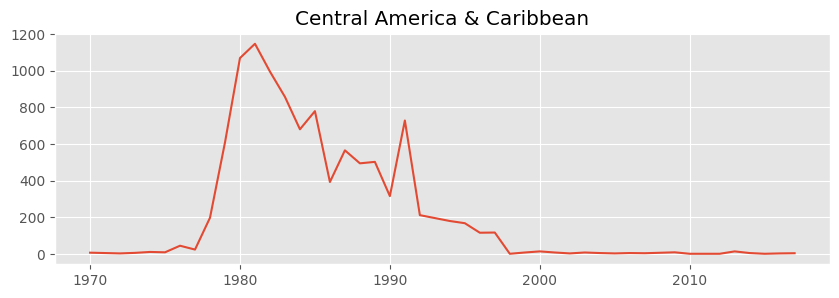

In [ ]:
plt.figure(figsize=(10,3))
df_Central_America_n_Caribbean.groupby('iyear')['iyear'].value_counts().plot()
plt.title('Central America & Caribbean')
plt.xlabel('')
plt.show()

1. Early Years (1970-1976): The region experienced relatively few attacks in the early 1970s, with single-digit occurrences each year. The number of attacks began to increase notably in 1976, reaching 45.

2. Significant Increase (1977-1982): There was a significant spike in the number of attacks starting in 1977, with a dramatic increase in 1978 (199 attacks). The peak was reached in 1980 with 999 attacks. This period marks the most intense activity in the region.

3. Decline and Fluctuations (1983-1992): After 1982, there was a gradual decline in the number of attacks, although the region still experienced relatively high activity until 1983 (842 attacks). The numbers continued to drop throughout the late 1980s and early 1990s.

4. Low Activity (1993-2017): Post-1992, the number of terrorist attacks significantly decreased, with many years recording single-digit occurrences. The 2000s and 2010s saw very few attacks, indicating a period of relative stability in the region.

5. Recent Years (2013-2017): A few isolated years like 2013 and 2016 saw slight increases, but overall, the region has remained much less affected by terrorist attacks compared to earlier decades.

**Overall Observations:**

---


* The most active period for terrorism in Central America & the Caribbean was from the mid-1970s to the early 1980s.
* After a peak in 1980, there was a general decline in the number of attacks.
* The region has seen a substantial decrease in terrorist activity since the early 1990s, with the last couple of decades being relatively quiet in terms of the number of attacks.

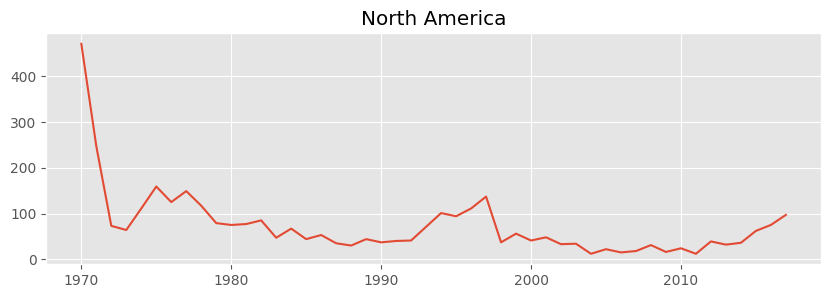

In [ ]:
plt.figure(figsize=(10,3))
df_North_America.groupby('iyear')['iyear'].value_counts().plot()

plt.title('North America')
plt.xlabel('')
plt.show()

**Trends Over Time:**


---


1. Early Activity (1970-1975):




* The 1970s started with a relatively high number of attacks, peaking at 467 in 1970.
* The numbers fluctuated but generally trended downward, with a significant drop after 1970, reaching 75 by 1980.

2. Stabilization (1980s-1990s):

* The 1980s saw relatively stable but lower levels of terrorist activity, with counts generally ranging between 30 to 100 attacks annually.
* The lowest count during this period was in 1983, with only 47 attacks, while the highest was in 1977 with 140 attacks.
* The 1990s continued this trend of moderate activity, with a notable increase in 1994 and 1996, reaching 101 and 110 attacks, respectively.

3. Low Activity (2000-2010):

* The first decade of the 2000s experienced lower activity overall, with most years recording below 50 attacks. The lowest point was in 2004 with just 12 attacks.
* This period marked a time of relative stability in North America, with consistently low numbers of terrorist incidents.

4. Resurgence and Recent Increase (2011-2017):

* From 2011 onwards, there was a gradual increase in the number of terrorist attacks, with significant growth in the mid-2010s.
The count nearly doubled from 39 attacks in 2012 to 75 in 2016.
* By 2017, the number of attacks had reached 97, the highest since the 1970s.

**Overall Observations:**

---


* High in the 1970s: North America experienced the highest level of terrorist activity in the early 1970s, particularly in 1970.
* Stabilization and Decline: The following decades saw a stabilization with generally moderate to low levels of activity.
* Recent Uptick: The data indicates a resurgence in terrorist activity in the 2010s, culminating in a significant increase by 2017.
* Historical Peak and Modern Trends: Despite the recent increase, the region has not seen levels comparable to the early 1970s in terms of the number of attacks. However, the rising trend in the 2010s suggests growing concerns.

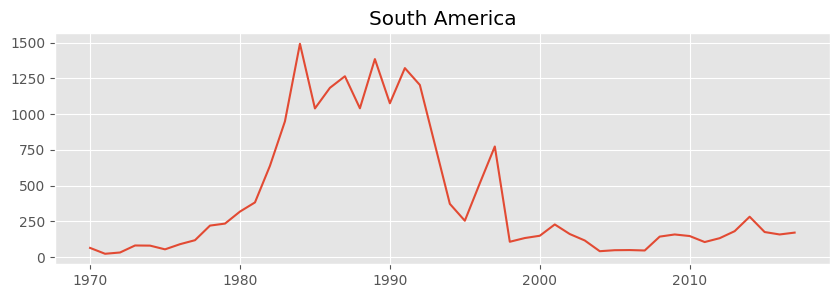

In [ ]:
plt.figure(figsize=(10,3))
df_South_America.groupby('iyear')['iyear'].value_counts().plot()

plt.title('South America')
plt.xlabel('')
plt.show()

**Trends Over Time:**

---


1. Initial Low Activity (1970-1972):

* South America experienced relatively low levels of terrorist attacks in the early 1970s, with counts ranging from 21 to 65 attacks per year.
Gradual Increase (1973-1982):

* Starting in 1973, there was a noticeable increase in the number of attacks. The numbers grew steadily, with significant jumps in 1978 (219 attacks) and 1979 (232 attacks).
* The upward trend continued into the early 1980s, with a peak of 608 attacks in 1982.

2. Peak Period (1983-1992):

* The mid-1980s to early 1990s saw the highest levels of terrorist activity in South America.
* The number of attacks peaked in 1989 with 1,367 incidents, followed by high counts in 1987 (1,250 attacks) and 1991 (1,317 attacks).
* This period represents the most intense phase of terrorist activity in the region.

3. Decline and Stabilization (1993-2007):

* After the peak in the early 1990s, there was a sharp decline in the number of attacks, particularly noticeable in the mid-1990s.
* The count dropped significantly to 251 in 1995 and further decreased to 42 by 2004.
* The early 2000s were marked by relatively low and stable levels of terrorist activity, with annual counts mostly below 150 attacks.

4. Recent Resurgence (2008-2017):

* The period from 2008 onwards saw a resurgence in terrorist attacks, with notable increases in 2008 (144 attacks) and 2014 (275 attacks).
* Although there was some fluctuation, the number of attacks remained relatively higher than in the early 2000s, with 167 attacks recorded in 2017.

**Overall Observations:**

---


* Peak in the Late 1980s: The late 1980s and early 1990s were the most violent periods in South America, with a significant number of terrorist attacks.
* Decline in the 1990s: Following this peak, the region experienced a substantial decline in terrorist activity, leading to relatively low levels in the late 1990s and early 2000s.
* Resurgence in the 2010s: The data suggests a resurgence of terrorist activity in the region during the 2010s, though it has not reached the levels observed in the late 1980s.









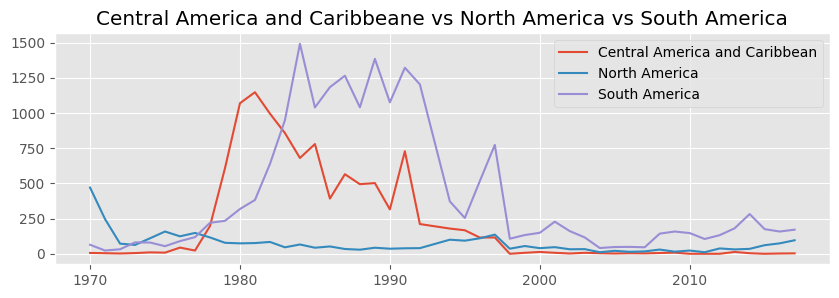

In [ ]:
plt.figure(figsize=(10,3))
df_Central_America_n_Caribbean.groupby('iyear')['iyear'].value_counts().plot(label='Central America and Caribbean')
df_North_America.groupby('iyear')['iyear'].value_counts().plot(label='North America')
df_South_America.groupby('iyear')['iyear'].value_counts().plot(label='South America')

plt.legend()
plt.title('Central America and Caribbeane vs North America vs South America')
plt.xlabel('')
plt.show()

* Central America & Caribbean: Experienced sharp increases in terrorist activities in the late 1970s and early 1980s, followed by a significant decline in the 1990s and a resurgence in the 2010s.
* North America: Saw low but fluctuating levels of terrorism, with occasional increases but generally maintaining lower levels than the other regions.
* South America: Had a major peak in terrorist activities in the late 1980s and early 1990s, followed by a steep decline and a subsequent resurgence in the late 2000s and 2010s.

---


Each region displays distinct patterns of terrorist activity over the decades, with Central and South America showing more significant fluctuations and North America maintaining relatively lower levels of terrorism.

## **Europe**

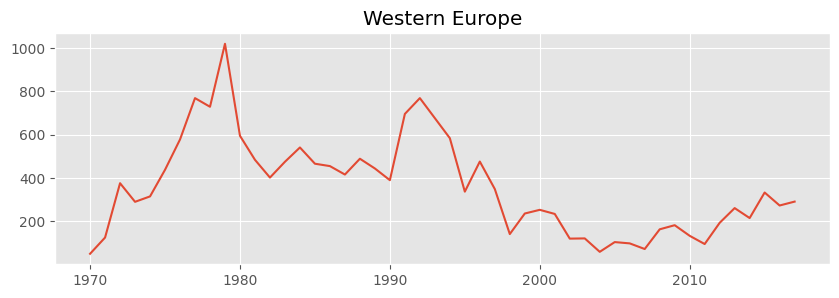

In [ ]:
plt.figure(figsize=(10,3))
df_Western_Europe.groupby('iyear')['iyear'].value_counts().plot()

plt.title('Western Europe')
plt.xlabel('')
plt.show()

**Early Years (1970-1976):**
* Gradual Increase: The number of terrorist attacks in Western Europe steadily rose from 50 incidents in 1970 to 554 incidents in 1976. This period marked the beginning of significant terrorist activity in the region.

**Peak Period (1977-1992):**
* High Activity: Western Europe experienced some of its most intense years of terrorist activity during this period. The highest number of attacks occurred in 1979 with 848 incidents.
* Continued Fluctuations: While there was some fluctuation, the region generally experienced a high number of terrorist attacks, with notable spikes in 1991 (693 incidents) and 1992 (766 incidents).

**Decline and Stabilization (1993-2007):**
* Sharp Decline: After 1992, the number of attacks significantly declined. By 2004, the number of incidents had dropped to as low as 59.
* Low Activity: The region saw relatively low levels of terrorist activity during this period, with most years recording fewer than 200 incidents.

**Recent Resurgence (2008-2017):**
* Increase in Attacks: There was a resurgence in terrorist activity in the late 2000s and 2010s. Notable peaks include 2009 (182 incidents) and 2015 (331 incidents).
* Consistent Levels: Although the levels were not as high as in the late 20th century, the number of incidents remained higher compared to the early 2000s, with 289 attacks recorded in 2017.

**Overall Observations:**

---


Western Europe experienced significant terrorist activity in the 1970s and 1980s, peaking in the late 1970s and early 1990s. After a period of decline and relative calm in the early 2000s, the region saw a resurgence in terrorist attacks in the late 2000s and 2010s. This resurgence indicates ongoing security challenges in the region, though the intensity has not reached the peaks of earlier decades.

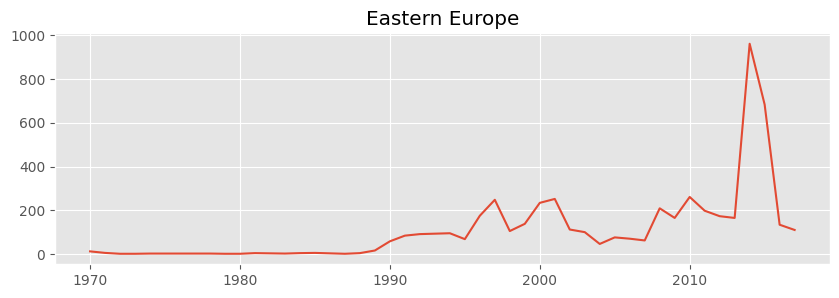

In [ ]:
plt.figure(figsize=(10,3))
df_Eastern_Europe.groupby('iyear')['iyear'].value_counts().plot()

plt.title('Eastern Europe')
plt.xlabel('')
plt.show()

**Early Years (1970-1989):**

Low to Moderate Activity: Eastern Europe experienced relatively low levels of terrorist attacks in the early years, with notable spikes in the late 1980s. The number of attacks ranged from 1 in some years to 16 in 1989.
Increase in Late 1980s: There was a noticeable increase in terrorist activities towards the end of the 1980s, with a significant rise in attacks recorded in 1989 (16 incidents) compared to previous years.

**Post-Soviet Surge (1990-2000):**

Significant Increase: After the end of the Cold War, the region saw a sharp increase in terrorist activities. The number of attacks rose significantly, peaking in 1996 (171 incidents) and continuing high in 1997 (237 incidents).
High Activity in Early 2000s: The early 2000s continued to show high levels of terrorist attacks, with 2000 reaching 234 incidents and 2001 at 252 incidents.

**Fluctuations and Peaks (2001-2015):**

Variable Activity: The number of attacks fluctuated in the 2000s. After peaking in 2001, the frequency of attacks declined but saw periodic increases, with notable peaks in 2008 (209 incidents) and 2010 (261 incidents).
Major Spike in 2014: There was a substantial increase in 2014, with a dramatic rise to 940 incidents. This spike indicates a significant escalation in terrorist activities in that year.

**Recent Trends (2016-2017):**

Decrease in Attacks: After the peak in 2014, the number of attacks decreased significantly. The years 2016 and 2017 saw lower numbers of attacks, with 134 incidents in 2016 and 109 in 2017.

**Overall Observations:**


---


Eastern Europe has seen periods of both low and high terrorist activity over the decades. The region experienced a significant rise in attacks post-Cold War, with peaks in the late 1990s and early 2000s. The most notable recent peak occurred in 2014, followed by a decline in subsequent years.

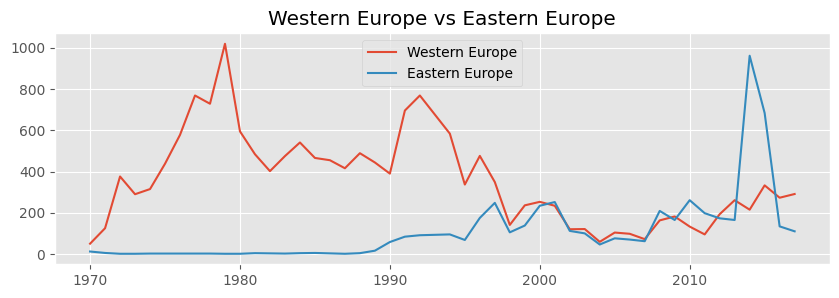

In [ ]:
plt.figure(figsize=(10,3))
df_Western_Europe.groupby('iyear')['iyear'].value_counts().plot(label='Western Europe')
df_Eastern_Europe.groupby('iyear')['iyear'].value_counts().plot(label='Eastern Europe')

plt.legend()
plt.title('Western Europe vs Eastern Europe')
plt.xlabel('')
plt.show()

* Western Europe has seen a steady increase in terrorist attacks, particularly from the late 1980s onwards, with notable peaks in the early 2000s and 2014. The region experienced a recent decline after the 2014 peak.
* Eastern Europe experienced a dramatic rise in attacks post-Cold War, peaking in the late 1990s and early 2000s. The region saw the highest spike in 2014, with a subsequent decline in recent years.

---


Both regions have faced significant periods of high terrorist activity, with distinct peaks and declines reflecting broader geopolitical and regional trends.








## **Africa And Middle East**

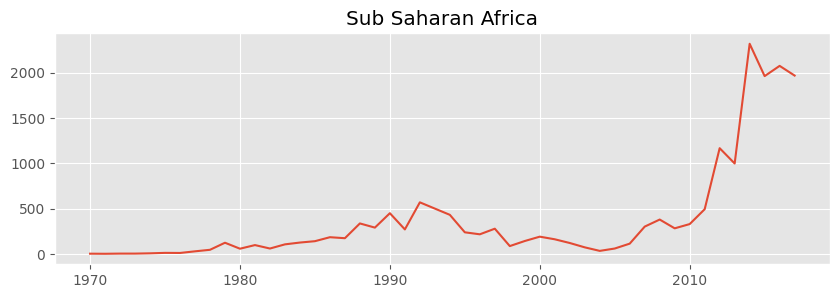

In [ ]:
plt.figure(figsize=(10,3))
df_Sub_Saharan_Africa.groupby('iyear')['iyear'].value_counts().plot()

plt.title('Sub Saharan Africa')
plt.xlabel('')
plt.show()

**Early Years (1970-1989):**

---


* Gradual Increase: Sub-Saharan Africa saw a gradual increase in terrorist attacks during this period. The number of attacks began at 3 in 1970 and grew to 289 by 1989.
* Notable Peaks: There were significant increases towards the end of the 1980s, with a notable peak of 124 incidents in 1979 and 334 in 1988.

**Post-Cold War Surge (1990-2000):**

---


* Sharp Rise: The 1990s witnessed a sharp rise in terrorist attacks. The number of incidents increased significantly from 447 in 1990 to 274 in 1997.
* High Activity in Late 1990s: The late 1990s continued the trend of high activity, with a peak of 560 attacks in 1992.

**2000s and Recent Trends (2001-2017):**

---


* Significant Increase: The early 2000s saw fluctuations but a general upward trend. There was a notable increase in attacks from 162 in 2001 to 302 in 2007.
* Dramatic Surge (2010-2017): The region experienced a dramatic surge in attacks starting in 2010, with significant peaks:

> **2012: 1160 attacks**

> **2014: 2305 attacks**

> **2015: 1920 attacks**

> **2016: 2046 attacks**

> **2017: 1959 attacks**





**Overall Observations:**

---


Early Increases: The number of terrorist attacks increased gradually from the 1970s through the late 1980s.
Post-Cold War Surge: The 1990s saw a sharp rise, continuing into the early 2000s.
Recent Surge: The most significant increase occurred from 2010 onwards, with the highest number of attacks recorded in 2014. The trend remains high through 2017.
Sub-Saharan Africa has experienced a substantial rise in terrorist activities over the decades, with the most dramatic increases occurring in recent years. The region's challenges reflect broader geopolitical tensions and conflicts.

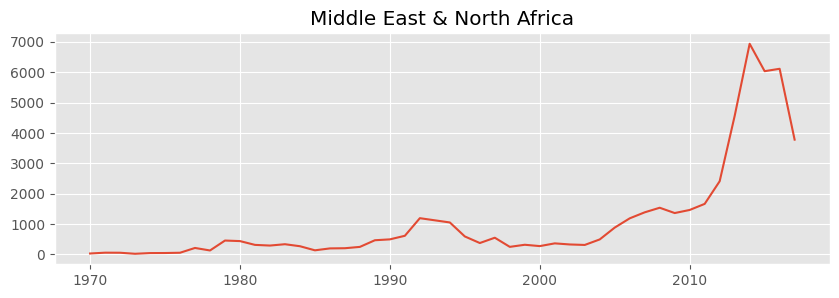

In [ ]:
plt.figure(figsize=(10,3))

df_Middle_East_n_North_Africa.groupby('iyear')['iyear'].value_counts().plot()

plt.title('Middle East & North Africa')
plt.xlabel('')
plt.show()

**Early Years (1970-1989):**

---


* Gradual Increase: The number of terrorist attacks started relatively low at 27 in 1970, with a steady increase over the years.
* Significant Peaks: The region saw notable peaks towards the late 1980s:

> **1979: 433 attacks**

> **1980: 420 attacks**

> **1989: 464 attacks**

**1990s Surge:**

---


* Significant Growth: The 1990s saw a notable increase in terrorist attacks, with a peak in the early 1990s:

> **1992: 1189 attacks**

> **1994: 1047 attacks**

> **1995: 579 attacks**

* Variability: There was variability in attack numbers, with a drop in the late 1990s:

> **1997: 539 attacks**

> **1998: 247 attacks**

**2000s and Recent Trends (2000-2017):**

---


* Sharp Increase: The early 2000s saw a significant rise in attacks:
> **2000: 272 attacks**
> **2001: 362 attacks**
> **2002: 326 attacks**
* Dramatic Surge: There was a dramatic increase starting around 2004:
> **2004: 492 attacks**
> **2005: 882 attacks**
> **2006: 1187 attacks**
> **2007: 1384 attacks**
> **2008: 1535 attacks**
Recent Highs: The trend continued upwards through the 2010s, with peak years:
> **2012: 2378 attacks**
> **2013: 4479 attacks**
> **2014: 6625 attacks**
> **2015: 5894 attacks**
> **2017: 3605 attacks**

**Overall Observations:**

---


* Early Increase: The number of attacks grew steadily from the 1970s through the late 1980s.
* 1990s Growth: A significant increase occurred in the early 1990s, with fluctuations in the late decade.

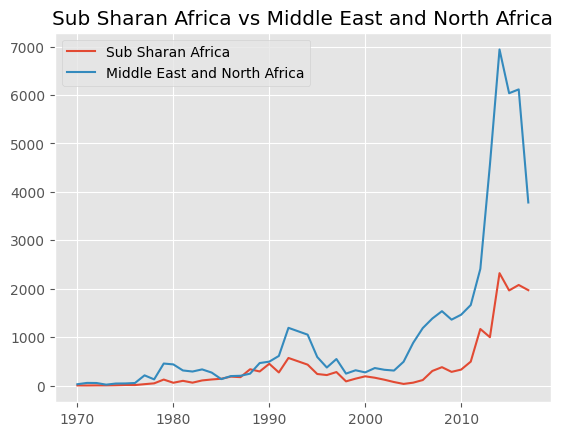

In [ ]:
df_Sub_Saharan_Africa.groupby('iyear')['iyear'].value_counts().plot(label='Sub Sharan Africa')
df_Middle_East_n_North_Africa.groupby('iyear')['iyear'].value_counts().plot(label='Middle East and North Africa')

plt.legend()
plt.title('Sub Sharan Africa vs Middle East and North Africa')
plt.xlabel('')
plt.show()

* **Early Trends:** Both regions saw increases in terrorist attacks from the 1970s, with peaks in the late 1980s and early 1990s.
* **1990s Comparison:** Both regions experienced significant surges in the early 1990s. Sub-Saharan Africa had a steady rise with peaks in the early 1990s, while the Middle East & North Africa showed high variability but a strong peak in 1992.

* **2000s and Recent Trends:**

> * Middle East & North Africa: Experienced a dramatic rise from the mid-2000s, peaking in 2014. There was a notable decline in attacks in 2017.

> * Sub-Saharan Africa: Also saw a dramatic increase, particularly noticeable in the 2010s, with high peaks similar to those in the Middle East & North Africa.

---



**Both regions have faced substantial increases in terrorist attacks, particularly in recent years, with notable peaks and ongoing high levels of violence. The trends reflect regional conflicts, instability, and varying levels of intensity and frequency of terrorist activities.**








## **Asia And oceana**

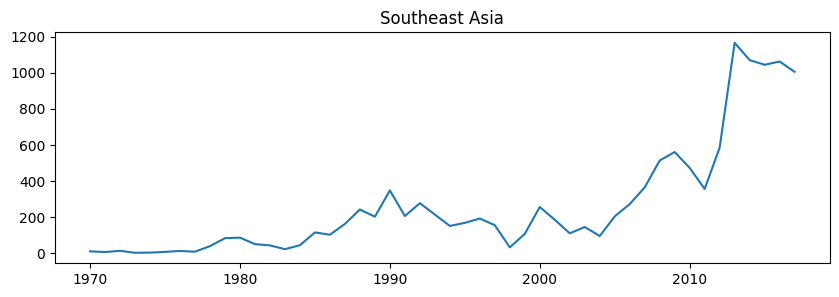

In [ ]:
plt.figure(figsize=(10,3))
df_Southeast_Asia.groupby('iyear')['iyear'].value_counts().plot()

plt.title('Southeast Asia')
plt.xlabel('')
plt.show()

**Summary Observations:**

---


* Early Trends: Southeast Asia experienced a gradual increase in terrorist attacks from the early 1970s, with significant spikes in the late 1970s and 1980s.
* 1990s Patterns: The 1990s saw fluctuations in attack numbers but an overall upward trend, indicating increasing instability.
* 2000s Surge: A dramatic increase in the number of attacks, particularly noticeable in the 2000s and early 2010s, with high peaks in the late 2000s and early 2010s.
* Recent Years: The region continued to experience high levels of terrorist attacks into the 2010s, with significant peaks in 2013 and 2014, followed by a slight decrease in the most recent years.

**Comparative Insights:**

---


* Overall Growth: Southeast Asia, like the other regions discussed, has seen a general increase in terrorist attacks over the decades, with notable peaks and high levels of violence in recent years.
* Peak Years: The early 2010s were particularly significant, with some of the highest recorded attack numbers, reflecting heightened regional instability and conflict.
* Recent Trends: Although there has been a slight decline in recent years, the levels of violence remain high compared to earlier decades.

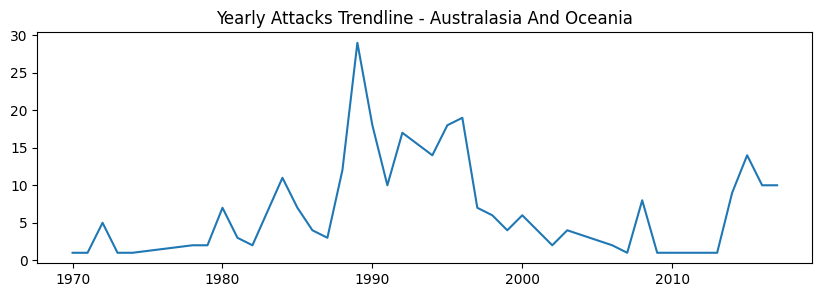

In [ ]:
plt.figure(figsize=(10,3))
df_Australasia_n_Oceania.groupby('iyear')['iyear'].value_counts().plot()

plt.title('Australasia & Oceania')
plt.title('Yearly Attacks Trendline - Australasia And Oceania')

plt.xlabel('')
plt.show()

**Summary Observations:**

---


* Overall Stability: Australia & Oceania generally experienced lower levels of terrorist attacks compared to many other regions.
* Decadal Trends: While there were some fluctuations and occasional spikes, the overall trend has been relatively stable with low attack numbers.
* Recent Trends: The number of attacks has remained low in recent years, with a few notable increases but overall stability.

**Comparative Insights:**

---


* Regional Stability: Compared to regions with higher conflict levels, such as Sub-Saharan Africa or the Middle East and North Africa, Australia & Oceania has maintained relatively low levels of terrorist activity.
* Variability: The region's attack numbers show variability with occasional increases but no sustained high levels of violence.

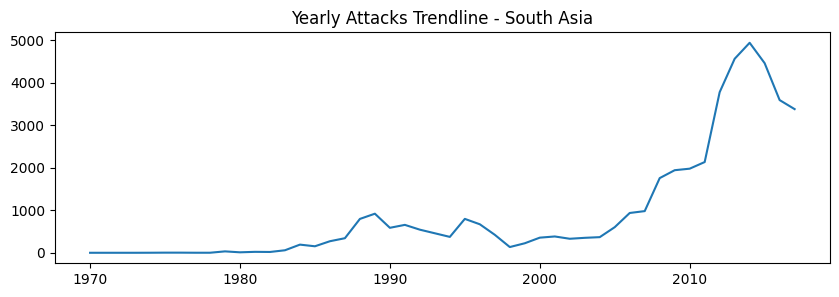

In [ ]:
plt.figure(figsize=(10,3))
df_South_Asia.groupby('iyear')['iyear'].value_counts().plot()

plt.title('South Asia')
plt.title('Yearly Attacks Trendline - South Asia')

plt.xlabel('')
plt.show()

**Summary Observations:**

---


* Overall Trends: South Asia has experienced a sustained high level of terrorist activity with significant peaks over the decades.
* Significant Peaks: There were notable peaks in the early 1990s and late 2000s, with the highest activity recorded between 2008 and 2013.
* Recent Trends: Although there has been a decrease from the peaks observed earlier in the decade, South Asia continues to experience a high level of terrorist activity.

**Comparative Insights:**

---


* High and Persistent Activity: South Asia stands out for its consistently high levels of terrorist activity, especially when compared to regions with more variable or lower levels.
* Peak Activity: The peaks in South Asia's terrorist activity are among the highest recorded in any region, particularly in the late 2000s and early 2010s.

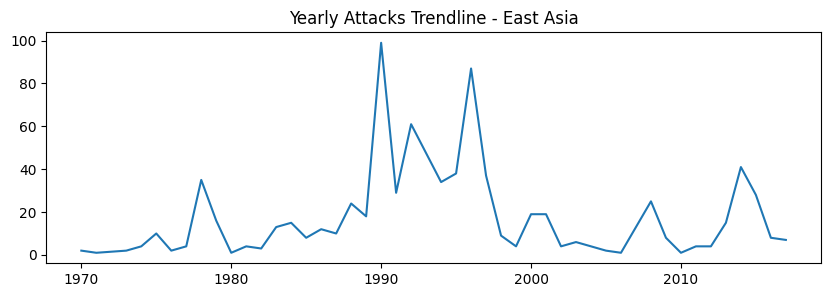

In [ ]:
plt.figure(figsize=(10,3))
df_East_Asia.groupby('iyear')['iyear'].value_counts().plot()

plt.title('East Asia')
plt.title('Yearly Attacks Trendline - East Asia')

plt.xlabel('')
plt.show()

**Summary Observations:**

---


* Overall Fluctuation: East Asia has experienced fluctuating levels of terrorist activity over the decades, with both significant increases and decreases in attack numbers.
* Decadal Trends: The region saw notable spikes in the 1990s and early 2000s but had periods of relatively low activity in recent years.
Recent Trends: The number of attacks in recent years has been relatively low, though with some variability.

**Comparative Insights:**

---


* Regional Variability: East Asia’s terrorist activity levels show more variability compared to regions with consistent high levels of attacks, such as Sub-Saharan Africa or the Middle East and North Africa.
* Trend Shifts: While there were significant spikes in the 1990s and early 2000s, recent years have seen a return to lower levels of activity, although not consistently.

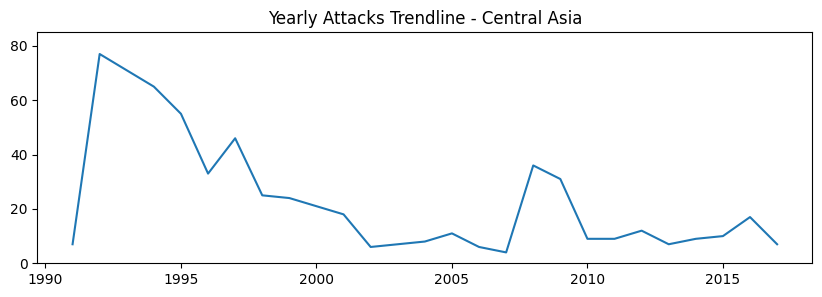

In [ ]:
plt.figure(figsize=(10,3))
df_Central_Asia.groupby('iyear')['iyear'].value_counts().plot()

plt.title('Central Asia')
plt.xlabel('')
plt.title('Yearly Attacks Trendline - Central Asia')


plt.ylim(0,85)
plt.show()

**Summary Observations:**

---


* Overall Trends: Central Asia shows a pattern of fluctuating terrorist activity with periods of both higher and lower numbers of attacks.
* Significant Peaks: The early 1990s and the late 2000s saw notable peaks in terrorist activity, with some years like 1992 and 2008 experiencing significant increases.
* Recent Trends: The region has seen a decline in recent years, with lower and more stable levels of terrorist activity.

**Comparative Insights:**

---


* Volatility: Central Asia's terrorist activity is more volatile compared to regions with consistent high levels of attacks, such as Sub-Saharan Africa or the Middle East and North Africa.
* Trend Shifts: There were notable spikes in the early 1990s and late 2000s, but recent years have generally seen lower levels of activity.







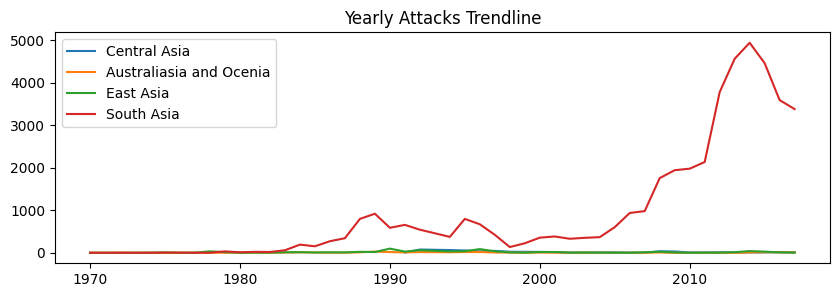

In [ ]:
plt.figure(figsize=(10,3))
df_Central_Asia.groupby('iyear')['iyear'].value_counts().plot(label='Central Asia')
df_Australasia_n_Oceania.groupby('iyear')['iyear'].value_counts().plot(label='Australiasia and Ocenia')
df_East_Asia.groupby('iyear')['iyear'].value_counts().plot(label='East Asia')
df_South_Asia.groupby('iyear')['iyear'].value_counts().plot(label='South Asia')


plt.legend()
plt.title('Attacks Per Year')
plt.xlabel('')
plt.title('Yearly Attacks Trendline')

plt.show()

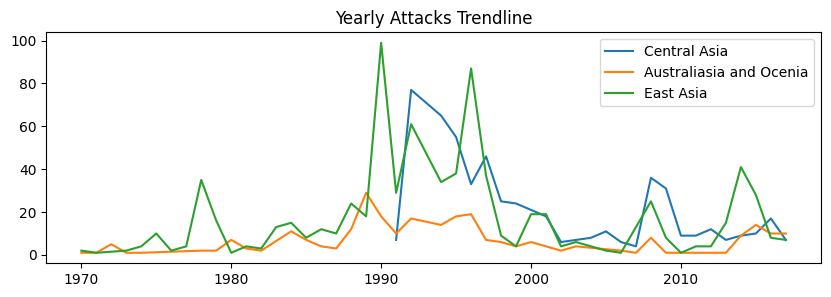

In [ ]:
plt.figure(figsize=(10,3))
df_Central_Asia.groupby('iyear')['iyear'].value_counts().plot(label='Central Asia')
df_Australasia_n_Oceania.groupby('iyear')['iyear'].value_counts().plot(label='Australiasia and Ocenia')
df_East_Asia.groupby('iyear')['iyear'].value_counts().plot(label='East Asia')



plt.legend()
plt.title('Yearly Attacks Trendline')

plt.xlabel('')
plt.show()

* South Asia has the highest and most persistent levels of terrorist activity across the entire period, with significant peaks, particularly in the late 2000s.
* Central Asia also exhibits extremely high levels of activity, especially from 2008-2014, surpassing many other regions.
Southeast Asia and East Asia show varying levels of activity, with Southeast * Asia experiencing more fluctuation and a decline in recent years, while East Asia has moderate levels with occasional peaks.
* Australian & Oceania maintains relatively low levels of activity compared to other Asian regions, with only sporadic incidents.

# **India**

In [22]:
df_india=df[df['country_txt']=='India']

In [ ]:
total_attacks=df_india['eventid'].count()
print(f'Total Terrorist Attacks Till 2017 as per Global Terrorism Data is {total_attacks}')

Total Terrorist Attacks Till 2017 as per Global Terrorism Data is 11828


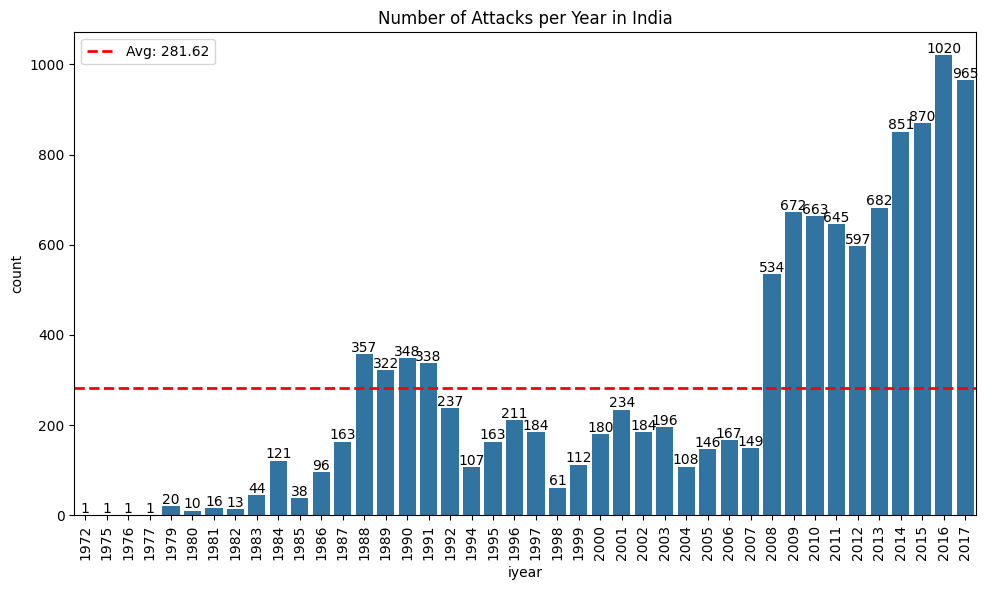

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10,6))

# Create the count plot
ax = sns.countplot(x='iyear', data=df_india)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add data points on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, '{:1.0f}'.format(height), ha="center")

# Calculate the average and add a horizontal line
avg = df_india['iyear'].value_counts().mean()
plt.axhline(avg, color='r', linestyle='dashed', linewidth=2, label=f'Avg: {avg:.2f}')

# Add a legend for the average line
plt.legend()

# Set the title and adjust layout
plt.title('Number of Attacks per Year in India')
plt.tight_layout()

# Show the plot
plt.show()


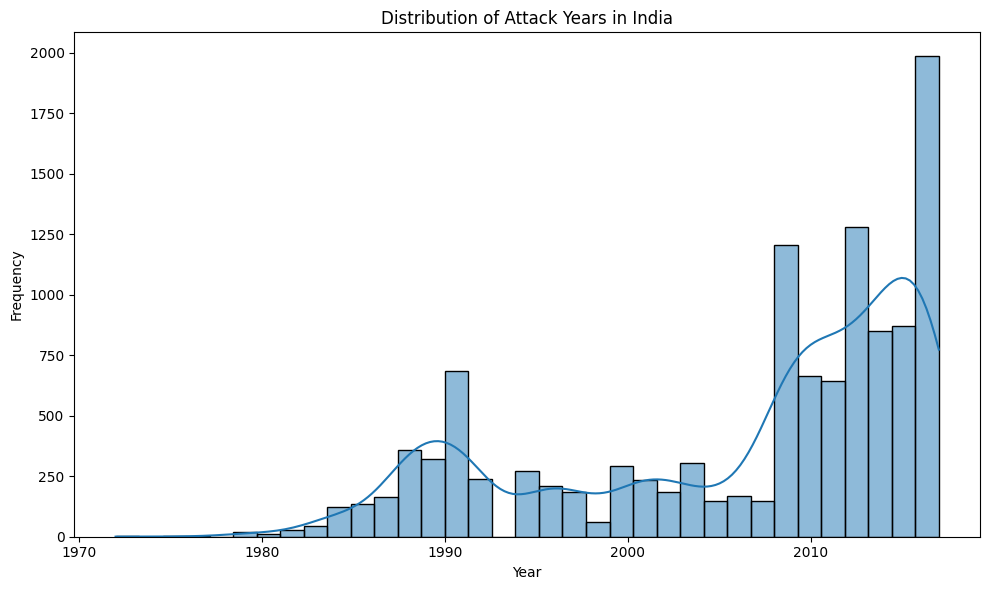

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10,6))

# Create the histogram with a kernel density estimate (KDE)
sns.histplot(df_india['iyear'], kde=True)



# Set the title and adjust layout
plt.title('Distribution of Attack Years in India')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.tight_layout()

# Show the plot
plt.show()


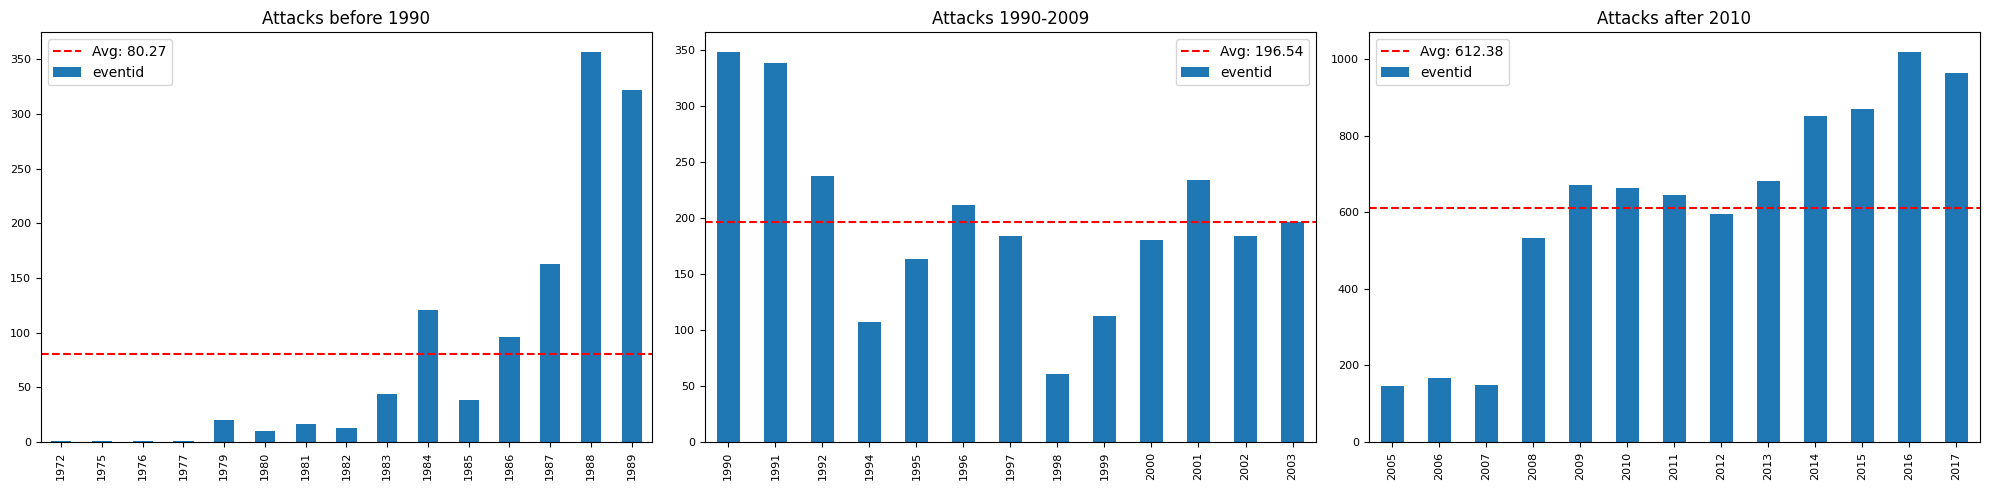

In [59]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Create a figure and an array of subplots (1 row, 3 columns)
fig, ax = plt.subplots(1, 3, figsize=(20, 5))  # Adjusted figure size for better readability

# Plot data for each time range on separate subplots
# Before 1990
before_1990 = df_india[df_india['iyear'] < 1990].groupby('iyear').count()['eventid']
before_1990.plot(kind='bar', ax=ax[0],legend=False)
avg_before_1990 = before_1990.mean()
ax[0].axhline(avg_before_1990, color='r', linestyle='--', label=f'Avg: {avg_before_1990:.2f}')
ax[0].set_title('Attacks before 1990')
ax[0].set_xlabel('')
ax[0].tick_params(axis='both', which='major', labelsize=8)
ax[0].legend()

# Between 1990 and 2009
between_1990_2009 = df_india[(df_india['iyear'] >= 1990) & (df_india['iyear'] < 2004)].groupby('iyear').count()['eventid']
between_1990_2009.plot(kind='bar', ax=ax[1],legend=False)
avg_between_1990_2009 = between_1990_2009.mean()
ax[1].axhline(avg_between_1990_2009, color='r', linestyle='--', label=f'Avg: {avg_between_1990_2009:.2f}')
ax[1].set_title('Attacks 1990-2009')
ax[1].set_xlabel('')
ax[1].tick_params(axis='both', which='major', labelsize=8)
ax[1].legend()

# After 2010
after_2010 = df_india[df_india['iyear'] >= 2005].groupby('iyear').count()['eventid']
after_2010.plot(kind='bar', ax=ax[2],legend=False)
avg_after_2010 = after_2010.mean()
ax[2].axhline(avg_after_2010, color='r', linestyle='--', label=f'Avg: {avg_after_2010:.2f}')
ax[2].set_title('Attacks after 2010')
ax[2].set_xlabel('')
ax[2].tick_params(axis='both', which='major', labelsize=8)
ax[2].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




**Recent Trends:**

The number of attacks has shown an increasing trend in recent years, with notable peaks in 2016 (1020 attacks) and 2017 (965 attacks). The numbers are relatively high compared to earlier years, indicating an escalation in incidents.

**Recent Highs:**

2016 had the highest number of attacks (1020), followed by 2017 (965), and 2015 (870). This suggests a surge in attacks over the past decade.

**Mid-2000s to Early 2010s:**

The years from 2008 to 2012 also show relatively high numbers, ranging from 534 to 597 attacks annually. The year 2010 had 663 attacks, indicating a significant number of incidents during this period.

**Decrease in Attacks:**

A noticeable decline is observed from the late 2010s onwards. For instance, the number of attacks dropped from 965 in 2017 to 1020 in 2016, indicating some fluctuation but generally high levels of activity.

**Early Trends:**

Earlier years, such as 1980 and 1970s, show very few incidents. The numbers gradually increased, with significant rises occurring in the late 1980s and early 1990s. For example, the year 1988 saw 357 attacks, and by 1990, the number had increased to 348.

**Low Incidence Years:**

The lowest number of attacks were recorded in the early 1970s, with a mere 1 attack reported in 1972, 1975, and 1976. The early data points indicate that incidents were rare during this time.


---


**Key Insights:**


Increasing Trend: There has been an overall increase in the number of attacks in recent years, with peaks in the mid-2010s.
Volatility: The number of attacks exhibits significant variability, with some years showing exceptionally high counts.
Recent Surge: The recent years have seen a notable rise in the number of attacks, suggesting a period of heightened activity.

In [165]:
result = df_india.groupby('provstate').agg(Attacks=('iyear', 'count'),Killed=('nkill', 'sum'),Wounded=('nwound','sum'),Most_Affected_City=('city','max'),Group=('gname','max')).reset_index()


# Create a Plotly treemap
fig = px.treemap(result,
                 path=['provstate'],
                 values='Attacks',
                 color='Killed',
                 color_continuous_scale='Reds',
                 hover_data=['Wounded', 'Most_Affected_City', 'Group'],
                 title="Terrorist Attacks in India by State")

# Update layout
fig.update_layout(
    title_font_size=20,
    margin=dict(t=50, l=25, r=25, b=25)
)

# Show the treemap
fig.show()

In [166]:
import plotly.express as px
import pandas as pd


# Group by 'provstate' and count occurrences of 'iyear'
provstate_counts = df_india.groupby('provstate').count()['iyear'].reset_index()
provstate_counts.columns = ['provstate', 'count']

# Sort the values by count
provstate_counts_sorted = provstate_counts.sort_values(by='count')

# Create a bar plot with Plotly
fig = px.bar(provstate_counts_sorted, x='provstate', y='count',
             title='Number of Incidents by State',
             labels={'provstate': 'State', 'count': 'Number of Incidents'},
             color='count', color_continuous_scale='gray_r')

# Update layout to add borders and customize appearance
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Number of Incidents',
    xaxis=dict(showline=True, linewidth=2, linecolor='black', gridcolor='lightgray'),
    yaxis=dict(showline=True, linewidth=2, linecolor='black', gridcolor='lightgray'),
    coloraxis_colorbar=dict(title='Number of Incidents')
)

# Add borders to bars
fig.update_traces(marker=dict(line=dict(color='black', width=1.5)))

# Show the plot
fig.show()


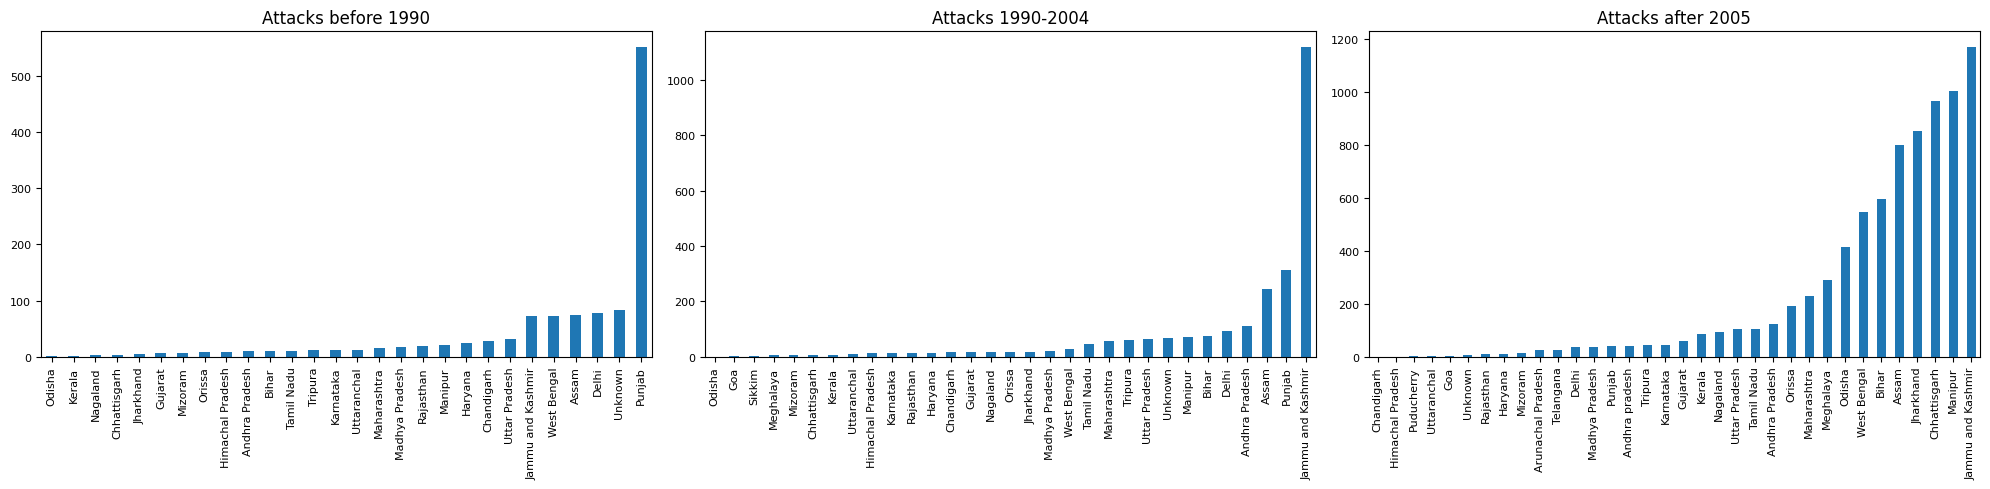

In [66]:
# Create a figure and an array of subplots (1 row, 3 columns)
fig, ax = plt.subplots(1, 3, figsize=(20, 5))  # Adjusted figure size for better readability

# Plot data for each time range on separate subplots
# Before 1990
before_1990 = df_india[df_india['iyear'] < 1990].groupby('provstate').count()['eventid'].sort_values()
before_1990.plot(kind='bar', ax=ax[0],legend=False)
ax[0].set_title('Attacks before 1990')
ax[0].set_xlabel('')
ax[0].tick_params(axis='both', which='major', labelsize=8)


# Between 1990 and 2009
between_1990_2004 = df_india[(df_india['iyear'] >= 1990) & (df_india['iyear'] < 2004)].groupby('provstate').count()['eventid'].sort_values()
between_1990_2004.plot(kind='bar', ax=ax[1],legend=False)
ax[1].set_title('Attacks 1990-2004')
ax[1].set_xlabel('')
ax[1].tick_params(axis='both', which='major', labelsize=8)


# After 2010
after_2005 = df_india[df_india['iyear'] >= 2005].groupby('provstate').count()['eventid'].sort_values()
after_2005.plot(kind='bar', ax=ax[2],legend=False)
ax[2].set_title('Attacks after 2005')
ax[2].set_xlabel('')
ax[2].tick_params(axis='both', which='major', labelsize=8)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Key Insights:**

* Geographical Hotspots: Northern and northeastern states, particularly Jammu and Kashmir, Assam, and Manipur, have experienced the highest levels of terrorist activity.
* Regional Disparities: States like Jammu and Kashmir and Assam show a significantly higher number of attacks compared to southern and western states.
* Lower Activity Areas: States such as Goa, Sikkim, and Puducherry experience very few incidents, reflecting lower levels of terrorist activity.
* Moderate Activity: States like Punjab, West Bengal, and Odisha have moderate levels of attacks, suggesting ongoing but less intense conflict.


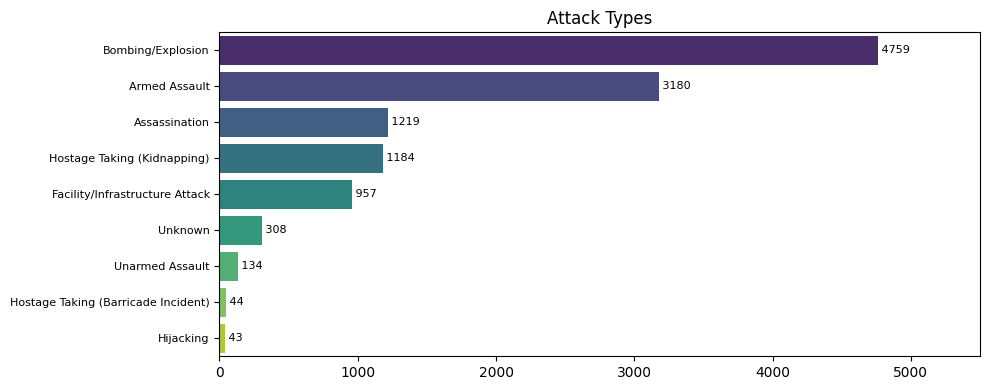

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
plt.figure(figsize=(10, 4))

# Create a horizontal bar plot
attack_counts = df_india.groupby('attacktype1_txt').count()['iyear'].sort_values(ascending=False)
ax = sns.barplot(x=attack_counts.values, y=attack_counts.index, palette='viridis')

# Add data points
for index, value in enumerate(attack_counts.values):
    ax.text(value, index, f' {value}', va='center',fontsize=8)

# Set titles and labels
plt.title('Attack Types')
plt.xlabel('Number of Attacks')
plt.xlim(0,5500)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=8)

# Adjust layout
plt.tight_layout()


# Show the plot
plt.show()


* **Most Common Types:** Bombing/explosions and armed assaults are the predominant attack types, highlighting their widespread use.

* **Variety in Attack Methods:** The range of attack types shows diverse tactics, from direct violence (armed assaults) to strategic disruptions (facility/infrastructure attacks).

* **Less Common Types:** Types such as hijacking and barricade incidents are less frequent, indicating specialized or less prevalent tactics.

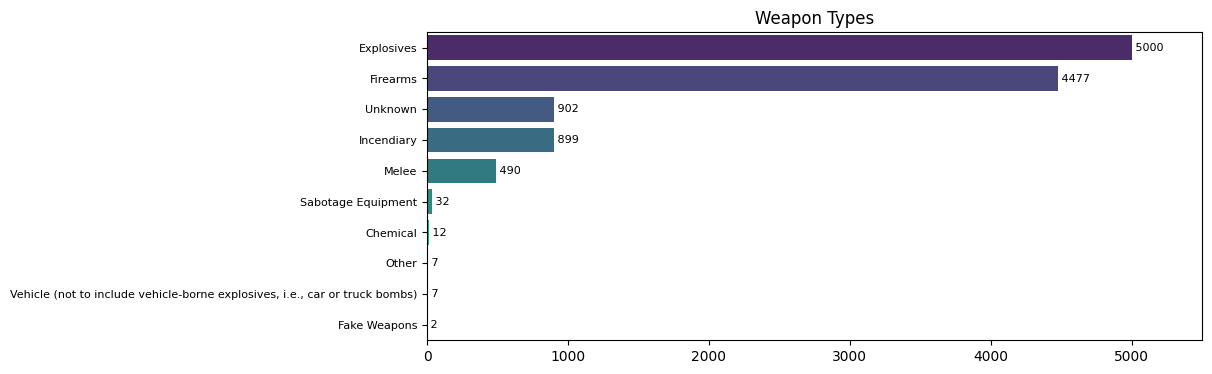

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
plt.figure(figsize=(10, 4))

# Create a horizontal bar plot
attack_counts = df_india.groupby('weaptype1_txt').count()['iyear'].sort_values(ascending=False)
ax = sns.barplot(x=attack_counts.values, y=attack_counts.index, palette='viridis')

# Add data points
for index, value in enumerate(attack_counts.values):
    ax.text(value, index, f' {value}', va='center',fontsize=8)

# Set titles and labels
plt.title('Weapon Types')
plt.xlabel('Number of Attacks')
plt.xlim(0,5500)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=8)


# Show the plot
plt.show()


* **Most Common Weapons:** Explosives and firearms are the most commonly used weapons in attacks, highlighting their prominence in violent incidents.

* **Diverse Weapon Types:** The range of weapon types shows a variety of methods used in attacks, from incendiary devices and melee weapons to more specialized tools like chemical and sabotage equipment.

* **Less Common Weapons:** Chemical weapons, vehicles (not including vehicle-borne explosives), and fake weapons are relatively rare, indicating specialized or less frequent use.

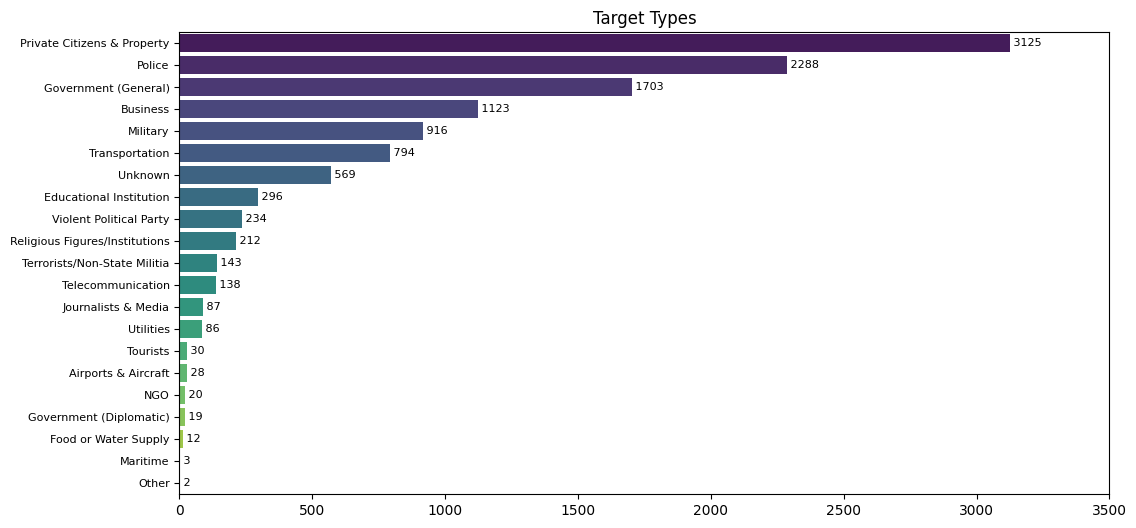

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Create a horizontal bar plot
attack_counts = df_india.groupby('targtype1_txt').count()['iyear'].sort_values(ascending=False)
ax = sns.barplot(x=attack_counts.values, y=attack_counts.index, palette='viridis')

# Add data points
for index, value in enumerate(attack_counts.values):
    ax.text(value, index, f' {value}', va='center',fontsize=8)

# Set titles and labels
plt.title('Target Types')
plt.xlabel('Number of Attacks')
plt.xlim(0,3500)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=8)



# Show the plot
plt.show()



* **High-Risk Sectors:** The sectors with the highest number of attacks are private citizens, police, and general government, highlighting areas of significant vulnerability and impact.
* **Diverse Targets:** The range of targets shows a broad spectrum of conflict and strategic interests, from civilians and law enforcement to businesses and infrastructure.
* **Impact on Essential Services:** Attacks on utilities, transportation, and communication services reflect the broader impact on societal functions and infrastructure.

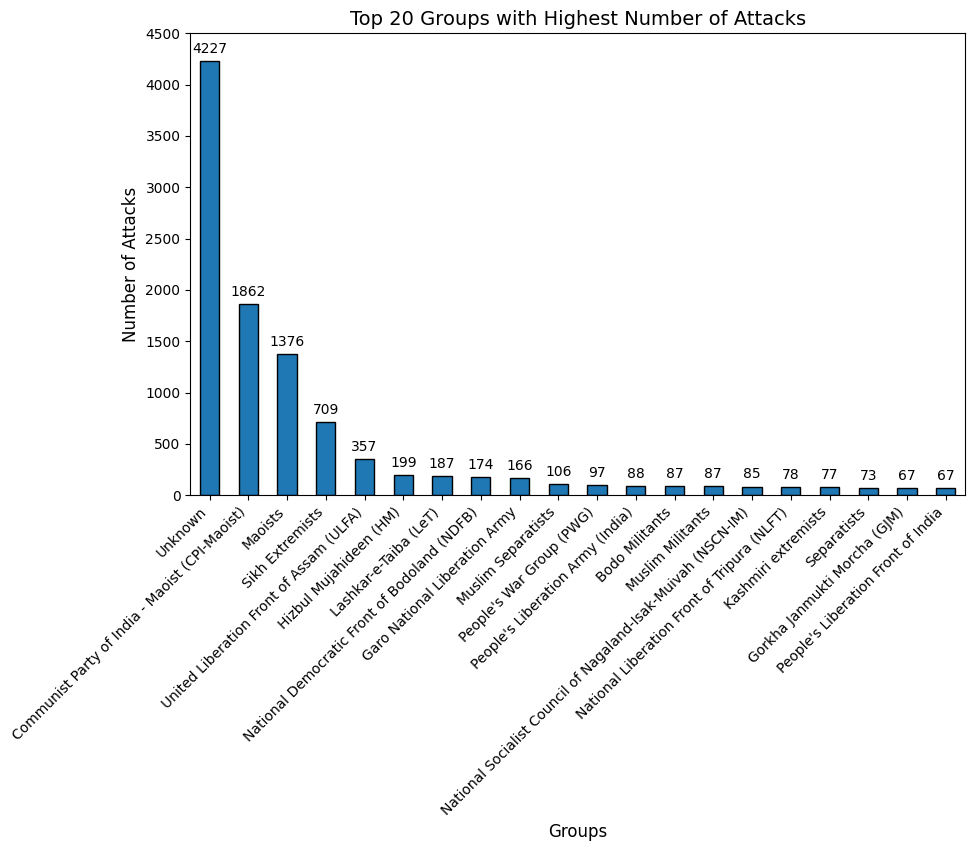

In [176]:
import matplotlib.pyplot as plt

# Create a figure with adjusted size
plt.figure(figsize=(10, 6))

# Plot data with additional adjustments
top_20_groups = df_india.groupby('gname').count()['iyear'].sort_values(ascending=False).head(20)
ax = top_20_groups.plot(kind='bar', edgecolor='black')

# Add data labels on top of each bar
for i, value in enumerate(top_20_groups):
    ax.text(i, value + 50, str(value), ha='center', va='bottom', fontsize=10, color='black')

# Set title and labels
plt.title('Top 20 Groups with Highest Number of Attacks', fontsize=14)
plt.xlabel('Groups', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0,4500)


# Display the plot
plt.show()


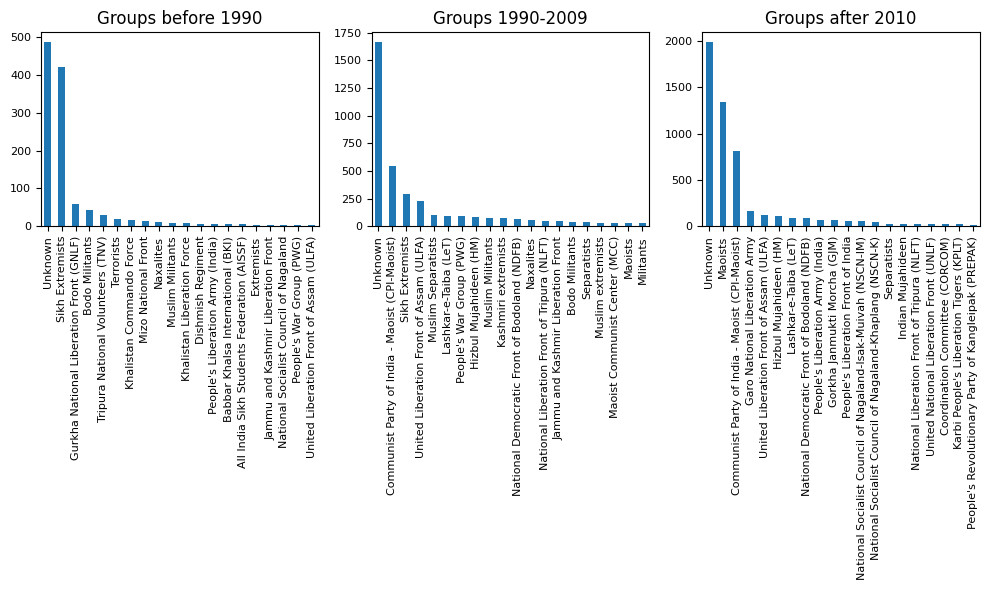

In [177]:
import matplotlib.pyplot as plt

# Create a figure and an array of subplots (1 row, 3 columns)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))  # Adjusted figure size for better readability

# Plot data for each time range on separate subplots
df_india[df_india['iyear'] < 1990].groupby('gname').count()['iyear'].sort_values(ascending=False).head(20).plot(kind='bar', ax=ax[0])
ax[0].set_title('Groups before 1990')
ax[0].set_xlabel('')
ax[0].tick_params(axis='both', which='major', labelsize=8)

df_india[(df_india['iyear'] >= 1990) & (df_india['iyear'] < 2010)].groupby('gname').count()['iyear'].sort_values(ascending=False).head(20).plot(kind='bar', ax=ax[1])
ax[1].set_title('Groups 1990-2009')
ax[1].set_xlabel('')
ax[1].tick_params(axis='both', which='major', labelsize=8)

df_india[df_india['iyear'] > 2010].groupby('gname').count()['iyear'].sort_values(ascending=False).head(20).plot(kind='bar', ax=ax[2])
ax[2].set_title('Groups after 2010')
ax[2].set_xlabel('')
ax[2].tick_params(axis='both', which='major', labelsize=8)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



**Observations:**

---


* **Dominant Groups:** The "Unknown" category has the highest number of attacks (4227), which suggests a significant portion of incidents are not attributed to specific groups.
* **Major Groups:** The Communist Party of India - Maoist (CPI-Maoist) and Maoists follow, with 1862 and 1376 attacks respectively.
* **High Activity:** Groups like Sikh Extremists, United Liberation Front of Assam (ULFA), and Hizbul Mujahideen (HM) have also been notably active.
* **Lower Representation:** Groups like Gorkha Janmukti Morcha (GJM) and People's Liberation Front of India have fewer attacks, with 67 each.